In [1]:
#load the library
library(tidyverse)
library(ggplot2)
library(data.table)
library(lubridate)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


Loading required package: timechange


Attaching package: ‘lubridate’


The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
#Read Data
Oct2019 <- fread("../input/ecommerce-behavior-data-from-multi-category-store/2019-Oct.csv",na.strings = c("NA","N/A",""))
Oct2019%>%
head(10)

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
<chr>,<chr>,<int>,<int64>,<chr>,<chr>,<dbl>,<int>,<chr>
2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NA,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NA,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
2019-10-01 00:00:05 UTC,view,1480613,2053013561092866779,computers.desktop,pulser,908.62,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9
2019-10-01 00:00:08 UTC,view,17300353,2053013553853497655,NA,creed,380.96,555447699,4fe811e9-91de-46da-90c3-bbd87ed3a65d
2019-10-01 00:00:08 UTC,view,31500053,2053013558031024687,NA,luminarc,41.16,550978835,6280d577-25c8-4147-99a7-abc6048498d6
2019-10-01 00:00:10 UTC,view,28719074,2053013565480109009,apparel.shoes.keds,baden,102.71,520571932,ac1cd4e5-a3ce-4224-a2d7-ff660a105880


In [3]:
glimpse(Oct2019)

Rows: 42,448,764
Columns: 9
$ event_time    <chr> "2019-10-01 00:00:00 UTC", "2019-10-01 00:00:00 UTC", "2…
$ event_type    <chr> "view", "view", "view", "view", "view", "view", "view", …
$ product_id    <int> 44600062, 3900821, 17200506, 1307067, 1004237, 1480613, …
$ category_id   <int64> 2103807459595387724, 2053013552326770905, 205301355979…
$ category_code <chr> NA, "appliances.environment.water_heater", "furniture.li…
$ brand         <chr> "shiseido", "aqua", NA, "lenovo", "apple", "pulser", "cr…
$ price         <dbl> 35.79, 33.20, 543.10, 251.74, 1081.98, 908.62, 380.96, 4…
$ user_id       <int> 541312140, 554748717, 519107250, 550050854, 535871217, 5…
$ user_session  <chr> "72d76fde-8bb3-4e00-8c23-a032dfed738c", "9333dfbd-b87a-4…


In [4]:
# converting to datetime object
Oct2019[['event_time']] <- as.POSIXct(Oct2019[['event_time']],
                                   format = "%Y-%m-%d %H:%M:%S")
Oct2019[['event_time']]<-  as.Date(Oct2019[['event_time']])

#converting user_id to character
Oct2019[['user_id']]<-as.character(Oct2019[['user_id']])

In [5]:
summary(Oct2019)

   event_time          event_type          product_id      
 Min.   :2019-10-01   Length:42448764    Min.   : 1000978  
 1st Qu.:2019-10-09   Class :character   1st Qu.: 1005157  
 Median :2019-10-16   Mode  :character   Median : 5000470  
 Mean   :2019-10-16                      Mean   :10549932  
 3rd Qu.:2019-10-23                      3rd Qu.:16000305  
 Max.   :2019-10-31                      Max.   :60500010  
  category_id                  category_code         brand          
 Min.   :2053013552226107603   Length:42448764    Length:42448764   
 1st Qu.:2053013555464110485   Class :character   Class :character  
 Median :2053013555631882655   Mode  :character   Mode  :character  
 Mean   :2057404237940793994                                        
 3rd Qu.:2053013563424899933                                        
 Max.   :2175419595093967522                                        
     price           user_id          user_session      
 Min.   :   0.00   Length:42448764    Le

In [6]:
#Delete the duplicate
Oct2019<-distinct(Oct2019)
#Delete missing value
data=na.omit(Oct2019)



event_type,n,percent
<chr>,<int>,<dbl>
view,16736551,100.000000
cart,547355,3.270417
purchase,507597,3.032865


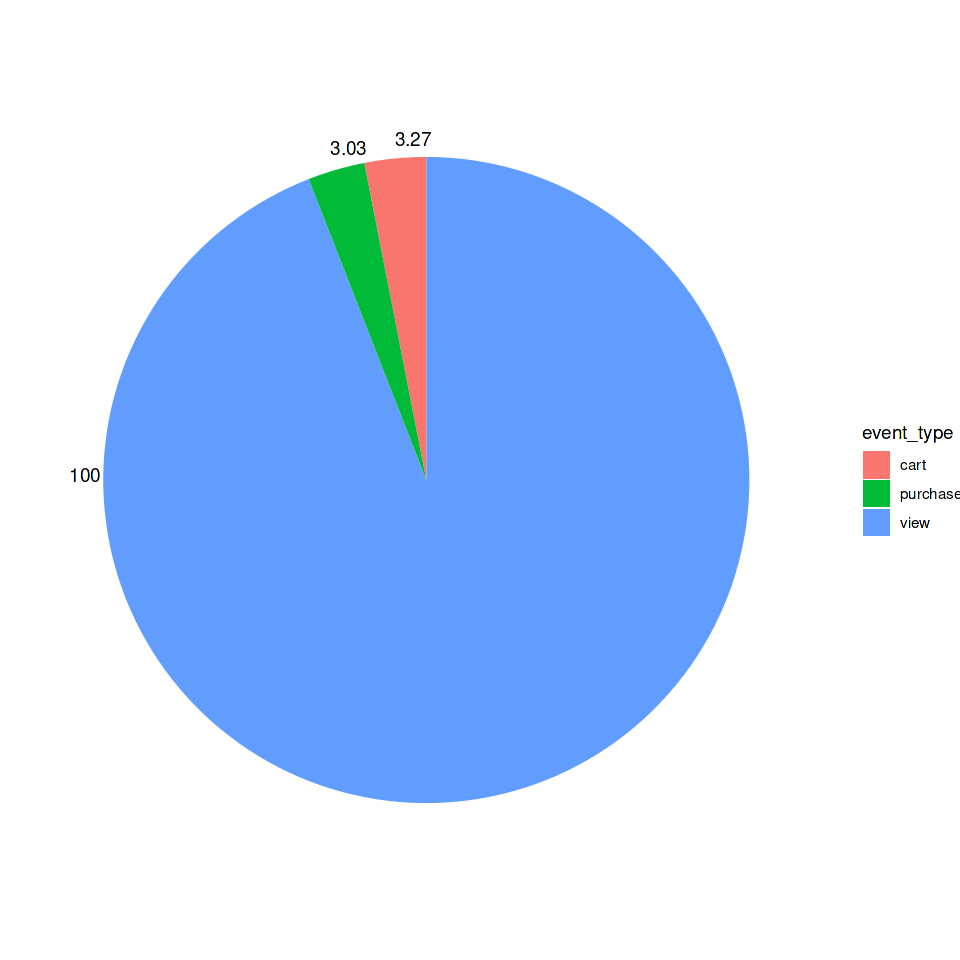

In [7]:
#check percentage of event_type : view, cart, purchase
data %>%
  count(event_type) %>%
  arrange(desc(n)) %>%
  mutate(percent = n / first(n) * 100)->event_conversion

event_conversion

options(repr.plot.width = 8, repr.plot.height = 8)
event_conversion%>%
    ggplot(aes(x="",y=percent, fill= event_type, label=percent))+
    geom_col() +
  coord_polar(
    theta = "y", 
    start = 0
  ) + 
geom_text(aes(x=1.5 ,label = round(percent, 2)) , position = position_stack(vjust =0.8))+
theme(legend.key.size = unit(1.5, 'cm'),legend.text = element_text(size=20))+
  theme_void()

In [28]:
top_category_n = 30
top_category = data['category_code'].value_counts()[:top_category_n].sort_values(ascending=False)
df = pd.DataFrame({'count':top_category, 'top_category':top_category })

squarify.plot(sizes=top_category, label=top_category.index.array, color=["red","cyan","green","orange","blue","grey"], alpha=.7  )
plt.axis('off')
plt.show()

ERROR: Error in parse(text = x, srcfile = src): <text>:2:37: unexpected symbol
1: top_category_n = 30
2: top_category = data['category_code'].value_counts
                                       ^


category_code,n,percent
<chr>,<int>,<dbl>
electronics.smartphone,7075284,42.274445
electronics.clocks,768060,4.589118
computers.notebook,709325,4.238179
electronics.audio.headphone,654373,3.909844
electronics.video.tv,630598,3.767789
appliances.kitchen.washer,503518,3.008493
apparel.shoes,486580,2.907290
appliances.kitchen.refrigerators,453578,2.710104
appliances.environment.vacuum,441937,2.640550


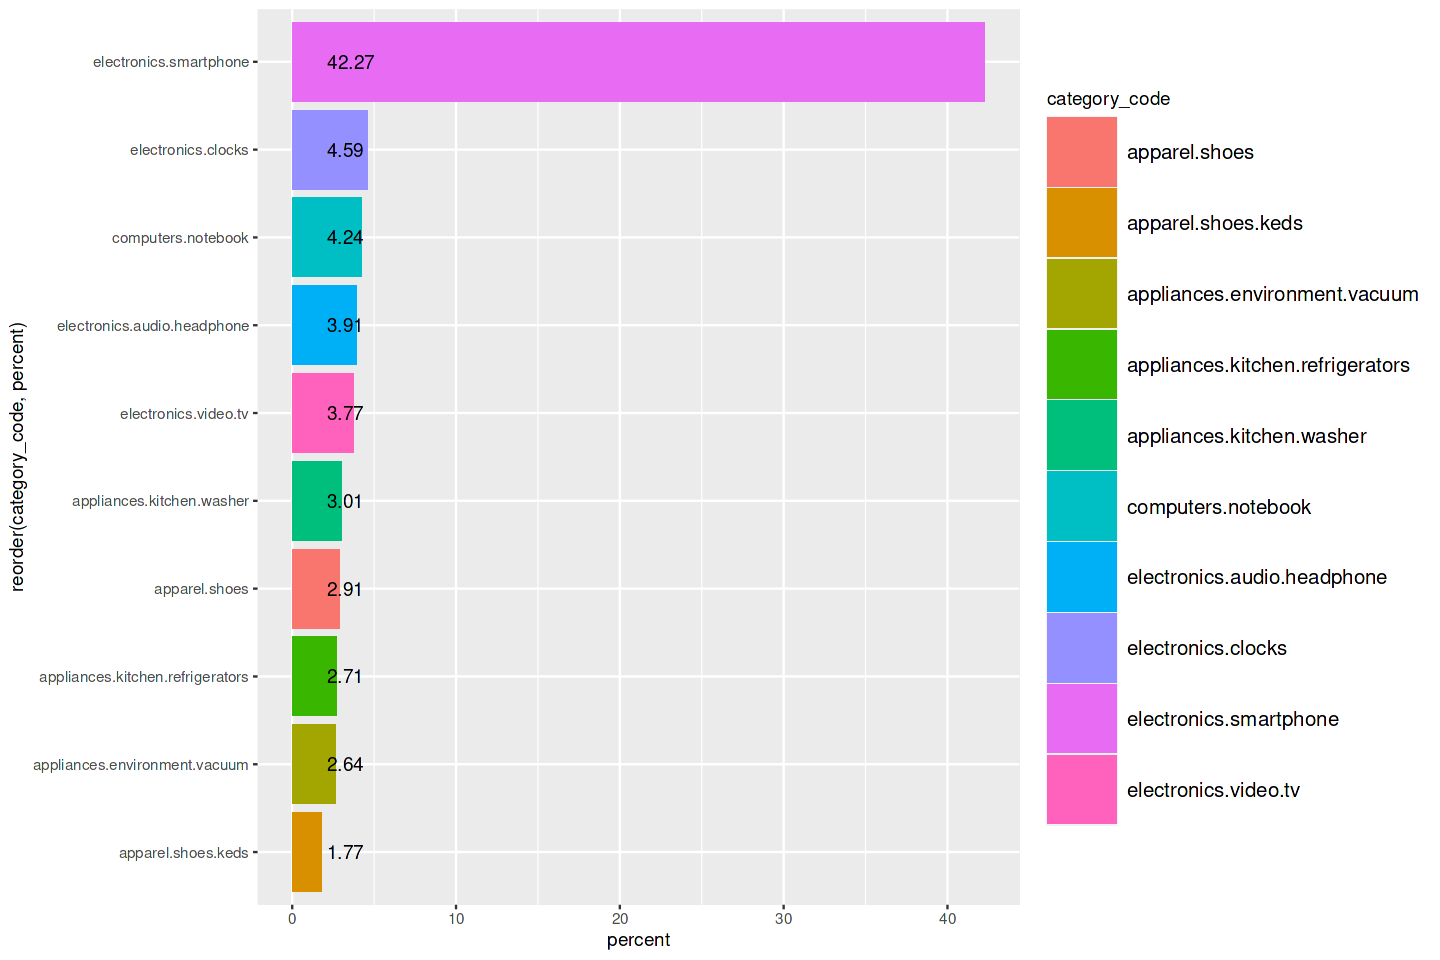

In [8]:
##Check total view from all category
data%>%
filter(event_type=='view')%>%
group_by(category_code)%>%
count(event_type)%>%
ungroup()%>%
mutate(percent= n/sum(n)*100)%>%
select(category_code,n, percent)%>%
arrange(desc(n))%>%
head(10)->top_view

top_view

options(repr.plot.width = 12, repr.plot.height = 8)
top_view%>%
    ggplot(aes(y=reorder(category_code,percent),x=percent,fill=category_code,label=percent))+
    geom_bar(stat='identity')+
geom_text(aes(x=2,label=round(percent,2), hjust=-0.05))+
theme(legend.key.size = unit(1.5, 'cm'),legend.text = element_text(size=12))




category_code,n,percent
<chr>,<int>,<dbl>
electronics.smartphone,308732,60.8222665
electronics.audio.headphone,27999,5.5159900
electronics.video.tv,20129,3.9655475
electronics.clocks,15358,3.0256286
appliances.kitchen.washer,14971,2.9493870
computers.notebook,14354,2.8278339
appliances.environment.vacuum,11623,2.2898086
appliances.kitchen.refrigerators,8317,1.6385046
electronics.tablet,5140,1.0126143


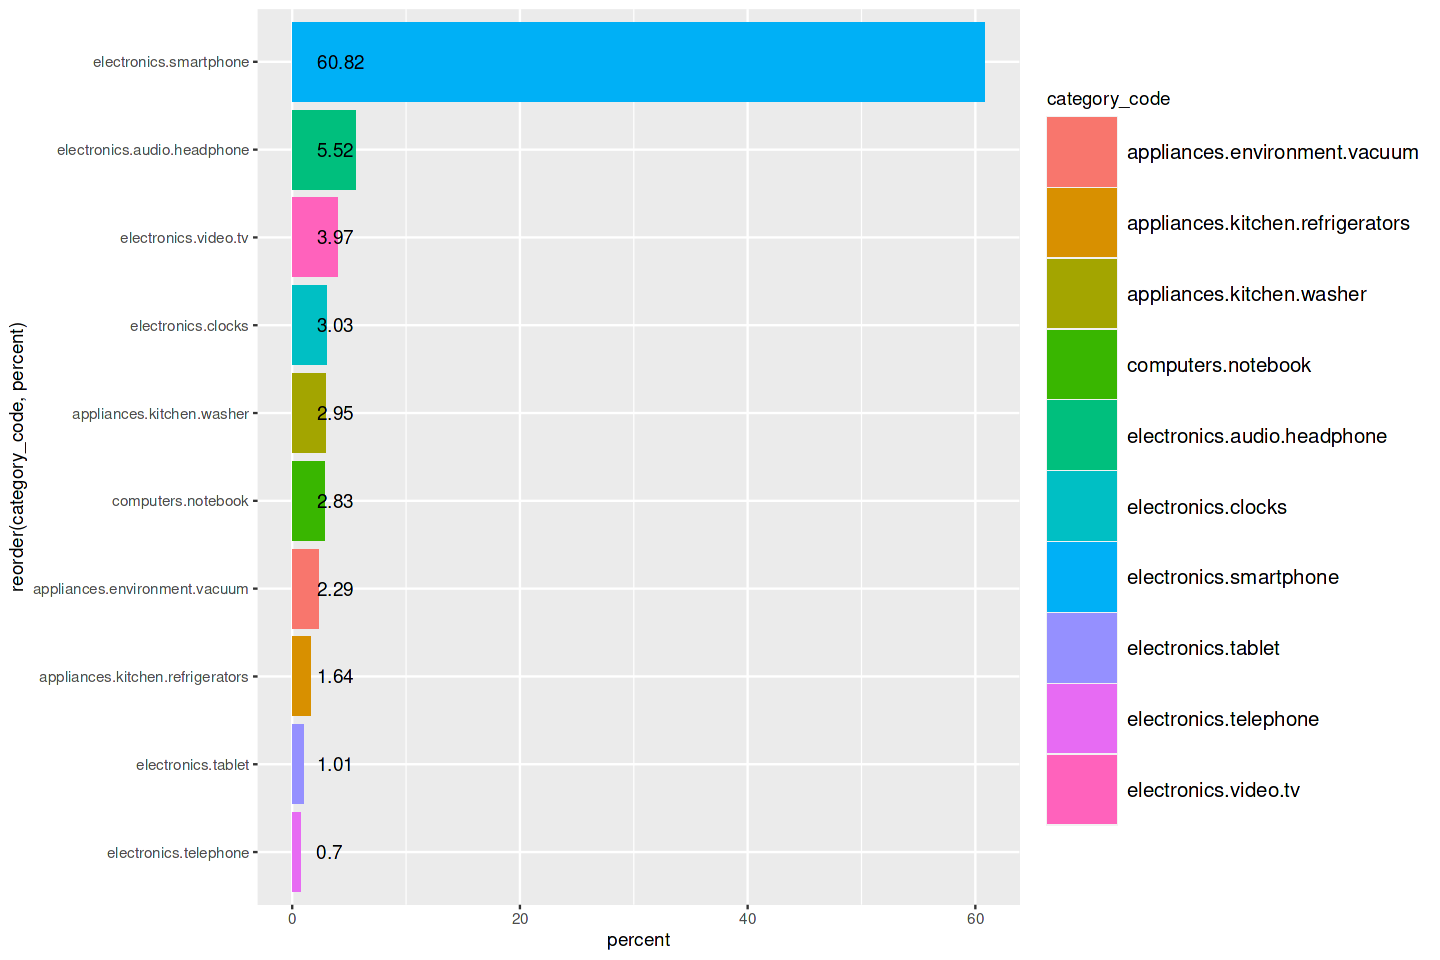

In [9]:
##Check total order from all category
data%>%
filter(event_type=='purchase')%>%
group_by(category_code)%>%
count('total_price'=sum(price))%>%
ungroup()%>%
mutate(percent= n/sum(n)*100)%>%
select(category_code,n, percent)%>%
arrange(desc(n))%>%
head(10)->top_order

top_order

options(repr.plot.width = 12, repr.plot.height = 8)
top_order%>%
    ggplot(aes(y=reorder(category_code,percent),x=percent,fill=category_code,label=percent))+
    geom_bar(stat='identity')+
geom_text(aes(x=2,label=round(percent,2), hjust=-0.05))+
theme(legend.key.size = unit(1.5, 'cm'),legend.text = element_text(size=12))


category_code,total_price,percent
<chr>,<dbl>,<dbl>
electronics.smartphone,143214650,76.5648962
computers.notebook,8278078,4.4255962
electronics.video.tv,7863871,4.2041543
appliances.kitchen.washer,4317120,2.3080028
electronics.clocks,4275754,2.2858883
electronics.audio.headphone,3227973,1.7257272
appliances.kitchen.refrigerators,3051833,1.6315601
appliances.environment.vacuum,1616582,0.8642514
electronics.tablet,1420009,0.7591599


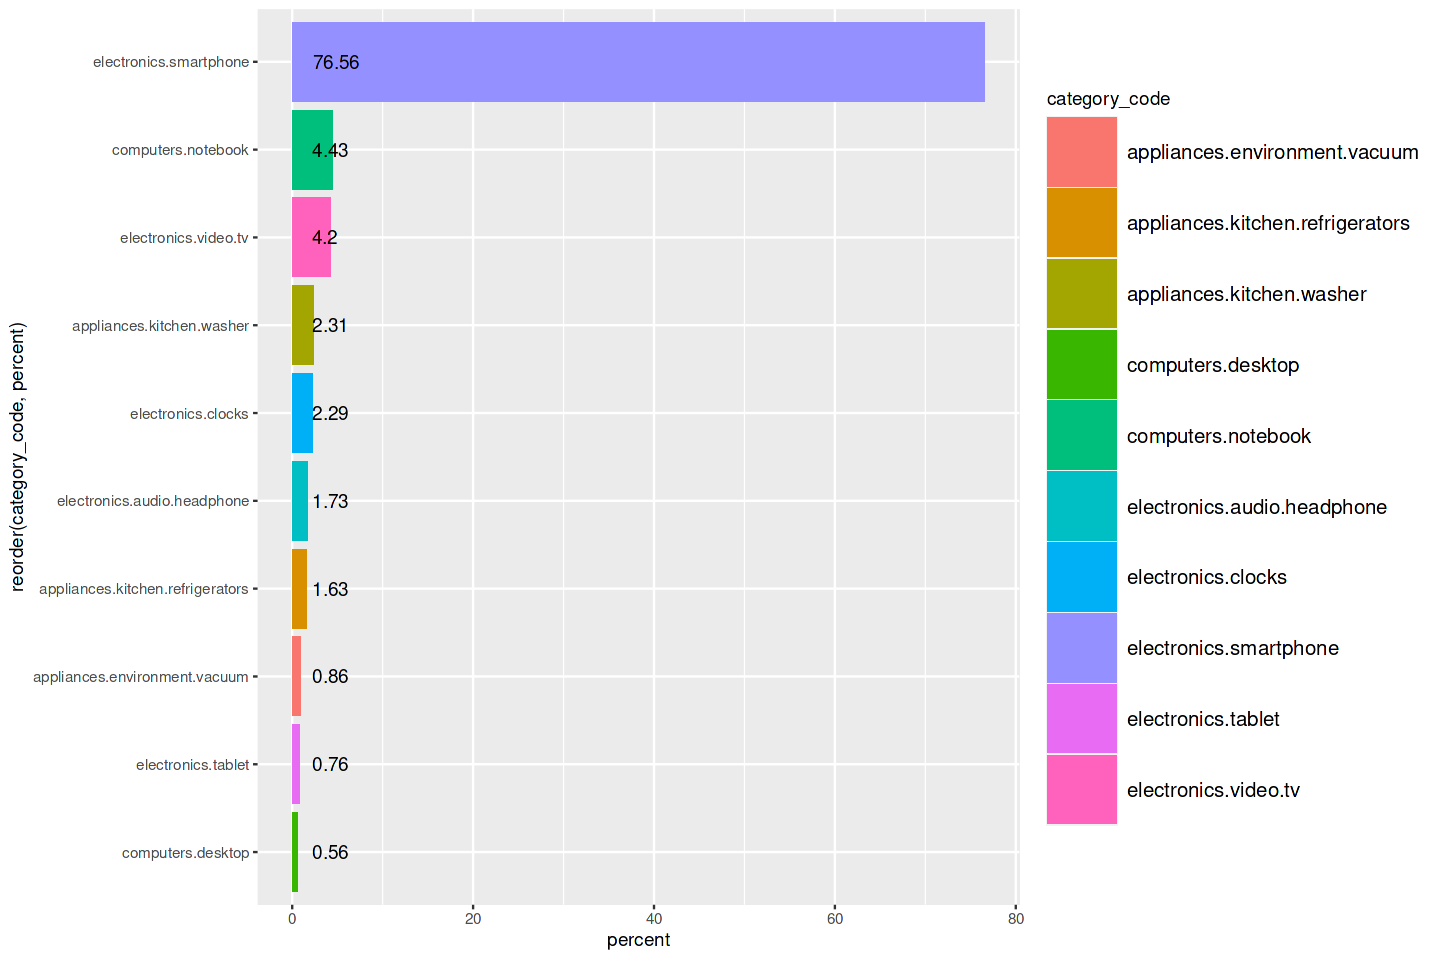

In [10]:
#Check GMV from all categories
data%>%
group_by(category_code)%>%
filter(event_type=='purchase')%>%
summarise(total_price=sum(price))%>%
arrange(desc(total_price))%>%
mutate(percent= total_price/sum(total_price)*100)%>%
head(10)->top_category

top_category
options(repr.plot.width = 12, repr.plot.height = 8)
top_category %>%
    ggplot(aes(y=reorder(category_code,percent),x=percent,fill=category_code,label=percent))+
    geom_bar(stat='identity')+
geom_text(aes(x=2,label=round(percent,2), hjust=-0.05))+
theme(legend.key.size = unit(1.5, 'cm'),legend.text = element_text(size=12))

brand,n,percent
<chr>,<int>,<dbl>
samsung,130789,42.36
apple,105322,34.11
xiaomi,35644,11.55
huawei,20072,6.50
oppo,9917,3.21
vivo,1837,0.60
meizu,1562,0.51
honor,519,0.17
nokia,492,0.16


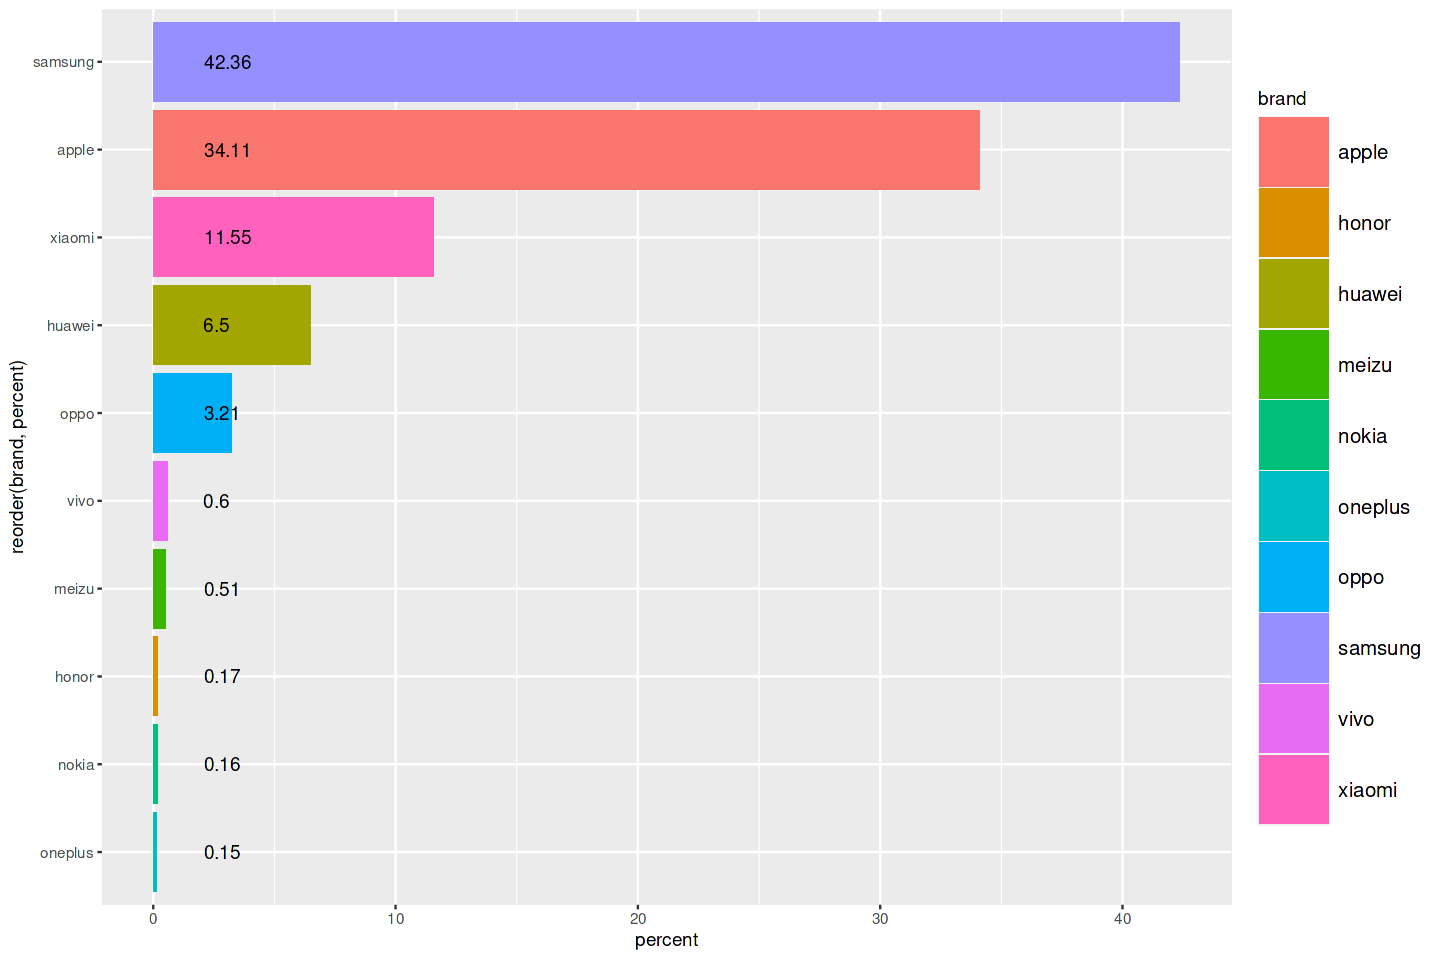

In [11]:
#Check Total Order from electronics smartphone category
data%>%
group_by(brand)%>%
filter(category_code=='electronics.smartphone', event_type=='purchase')%>%
count(brand)%>%
ungroup()%>%
mutate(percent=round(n/sum(n)*100, 2))%>%
arrange(desc(percent))%>%
head(10)->smartphone_brand

smartphone_brand

options(repr.plot.width = 12, repr.plot.height = 8)
smartphone_brand%>%
    ggplot(aes(y=reorder(brand,percent),x=percent,fill=brand,label=percent))+
    geom_bar(stat='identity')+
geom_text(aes(x=2,label=round(percent,2), hjust=-0.05))+
theme(legend.key.size = unit(1.5, 'cm'),legend.text = element_text(size=12))

brand,total_price,percent
<chr>,<dbl>,<dbl>
apple,93559446.7,65.33
samsung,34205399.5,23.88
xiaomi,7389737.1,5.16
huawei,4326444.4,3.02
oppo,2206204.7,1.54
vivo,452163.7,0.32
oneplus,320605.5,0.22
meizu,196395.8,0.14
sony,161204.4,0.11


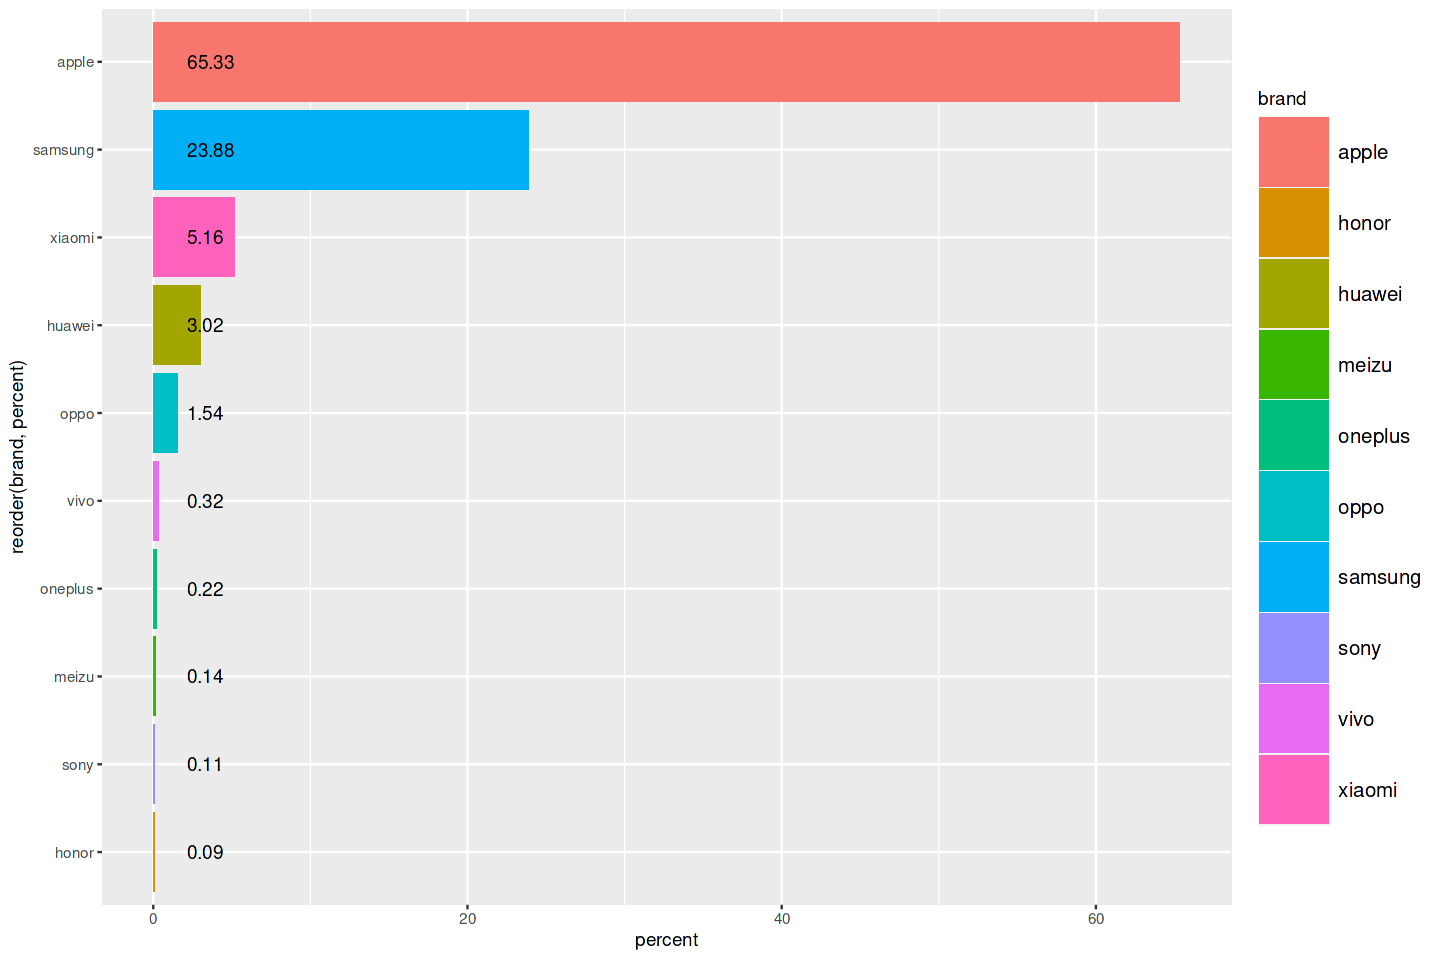

In [12]:
#check GMV from electronics smartphone category
data%>%
group_by(brand)%>%
filter(category_code=='electronics.smartphone', event_type=='purchase')%>%
summarise(total_price=sum(price))%>%
arrange(desc(total_price))%>%
mutate(percent= round(total_price/sum(total_price)*100,2))%>%
head(10)->smartphone_price

smartphone_price

options(repr.plot.width = 12, repr.plot.height = 8)
smartphone_price%>%
    ggplot(aes(y=reorder(brand,percent),x=percent,fill=brand,label=percent))+
    geom_bar(stat='identity')+
geom_text(aes(x=2,label=round(percent,2), hjust=-0.05))+
theme(legend.key.size = unit(1.5, 'cm'),legend.text = element_text(size=12))

Apple total order is lower than Samsung, but Apple GMV price is much higher than Samsung

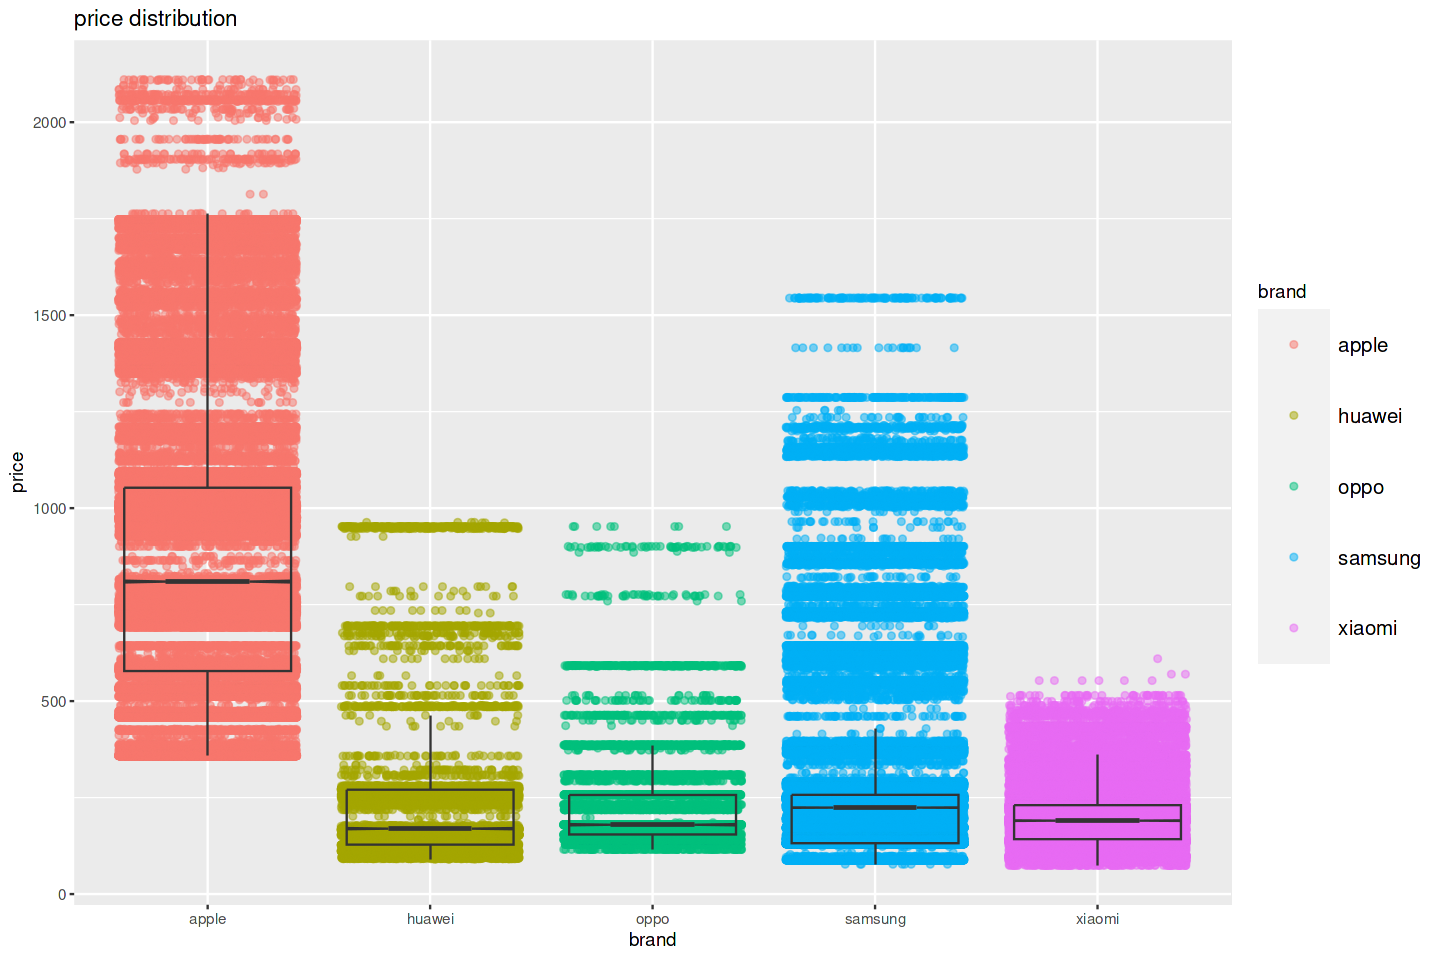

In [13]:
#Check price distribution
data%>%
group_by(brand)%>%
filter(category_code=='electronics.smartphone', event_type=='purchase', 
       brand=='apple'|brand=='samsung'|brand=='xiaomi'|brand== 'huawei'|brand=='oppo')%>% 
  ggplot(aes(x = brand, y = price)) +
geom_jitter(
    aes(col = brand),
    alpha = 0.5
  )+
  geom_boxplot(alpha = 0, notch = TRUE) + 
  labs(title = "price distribution")+theme(legend.key.size = unit(1.5, 'cm'),legend.text = element_text(size=12))


huawei and oppo have similarity price distribution.

Check daily view,cart, and purchase from brand apple, samsung, xiaomi, huawei and oppo

day,event_type,n
<date>,<chr>,<int>
2019-10-01,view,33916
2019-10-02,view,34295
2019-10-03,view,33007
2019-10-04,view,38329
2019-10-05,view,36043
2019-10-06,view,36007


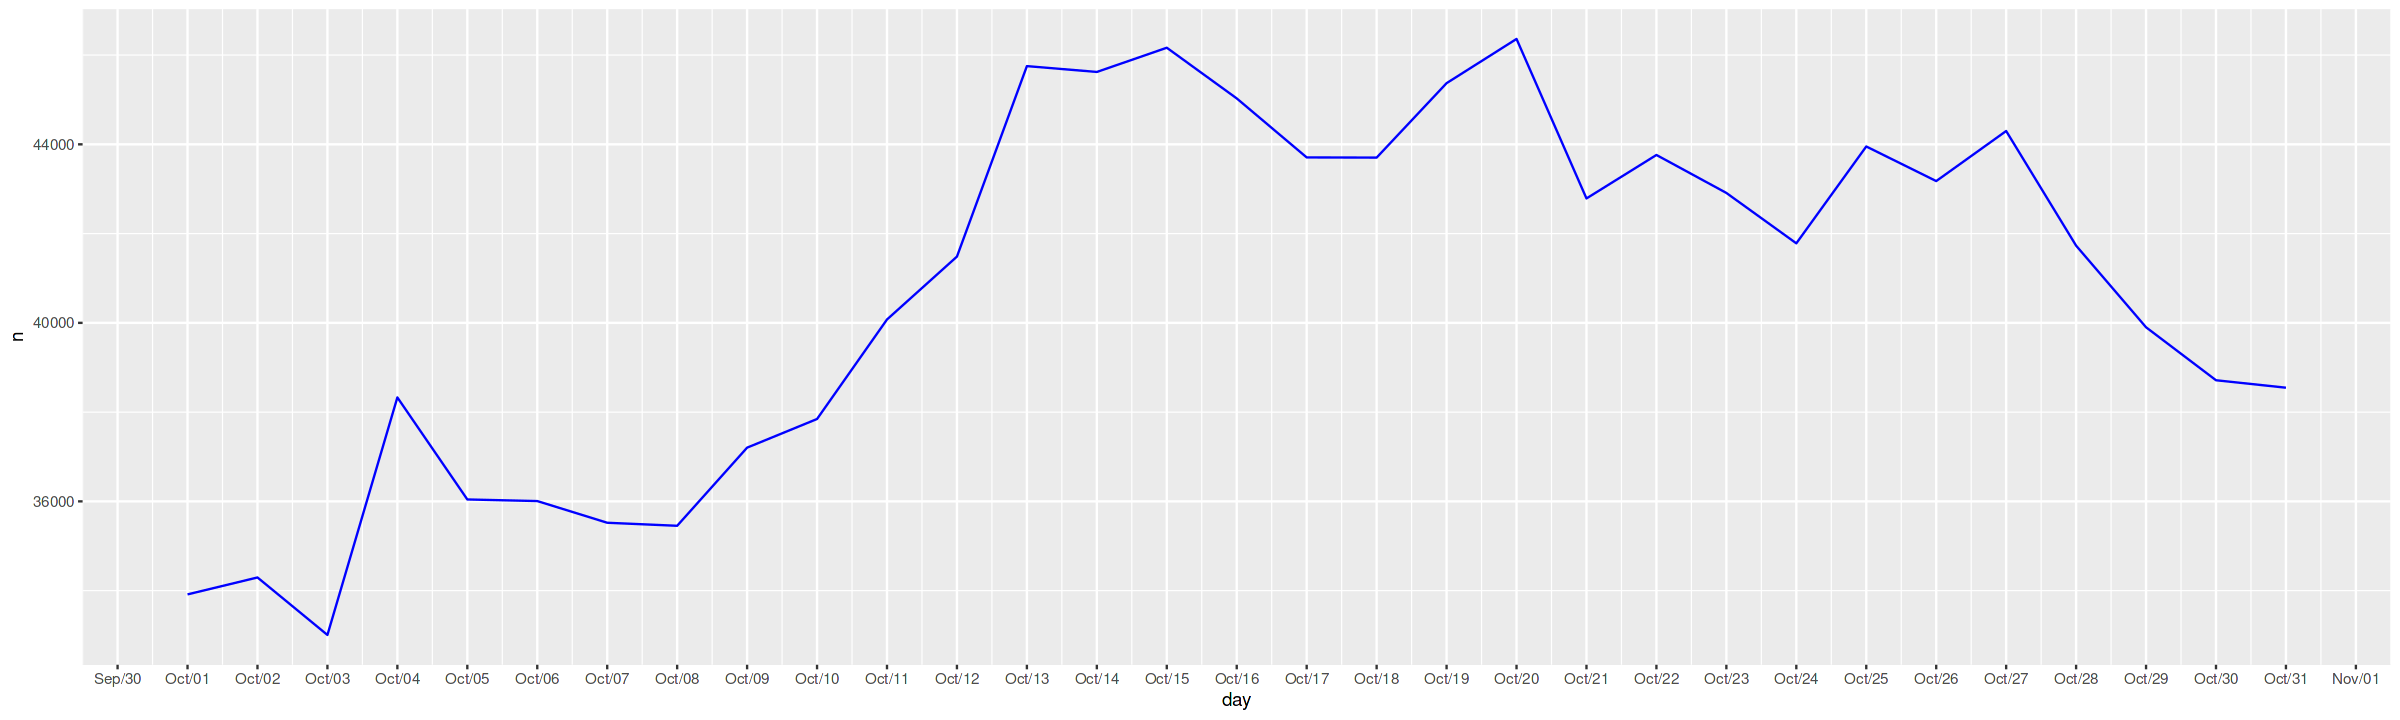

In [14]:
#check xiaomi daily view
data%>%
group_by(day= floor_date(event_time, 'day'))%>%
filter(category_code=='electronics.smartphone', event_type=='view', brand=='xiaomi')%>%
count(event_type) ->xiaomi_view


head(xiaomi_view)

options(repr.plot.width = 20, repr.plot.height = 6)
xiaomi_view%>%
ggplot(aes(x=day,y=n))+
geom_line(color='blue')+
scale_x_date(date_breaks = "day",date_labels = "%b/%d")

day,event_type,n
<date>,<chr>,<int>
2019-10-01,cart,834
2019-10-02,cart,891
2019-10-03,cart,927
2019-10-04,cart,1956
2019-10-05,cart,1644
2019-10-06,cart,1551


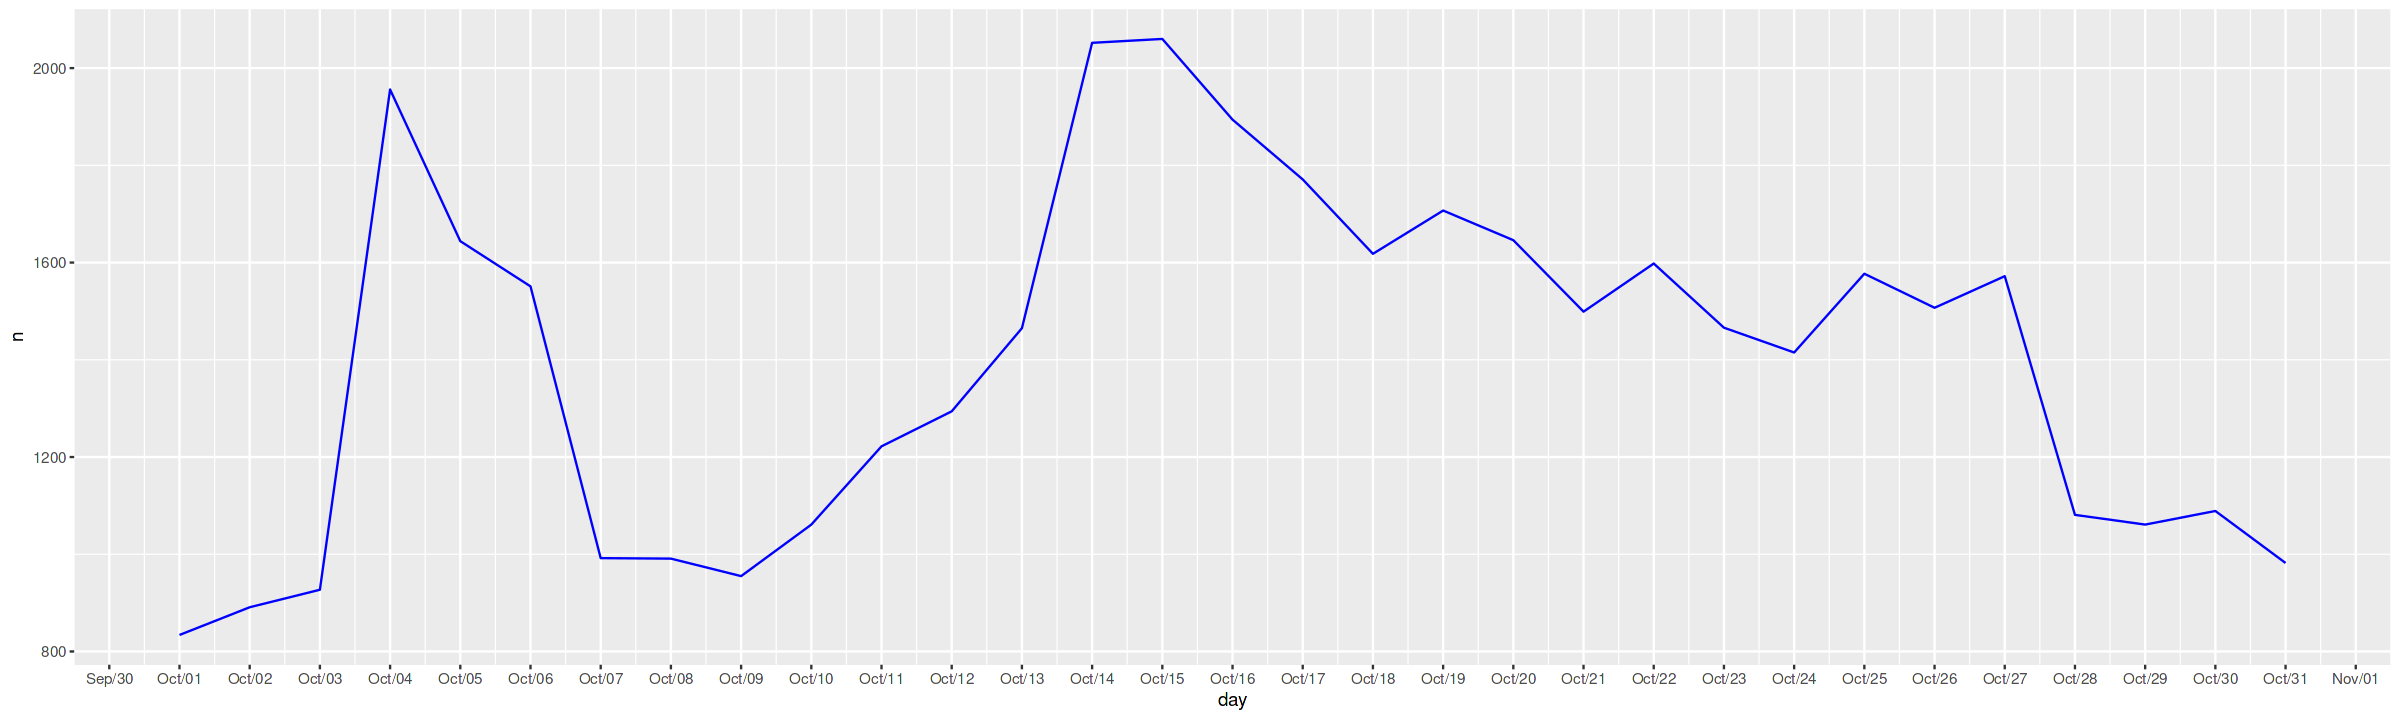

In [15]:
#check xiaomi daily view
data%>%
group_by(day= floor_date(event_time, 'day'))%>%
filter(category_code=='electronics.smartphone', event_type=='cart', brand=='xiaomi')%>%
count(event_type) ->xiaomi_cart


head(xiaomi_cart)

options(repr.plot.width = 20, repr.plot.height = 6)
xiaomi_cart%>%
ggplot(aes(x=day,y=n))+
geom_line(color='blue')+
scale_x_date(date_breaks = "day",date_labels = "%b/%d")

day,event_type,n
<date>,<chr>,<int>
2019-10-01,purchase,903
2019-10-02,purchase,901
2019-10-03,purchase,894
2019-10-04,purchase,1210
2019-10-05,purchase,1135
2019-10-06,purchase,1125


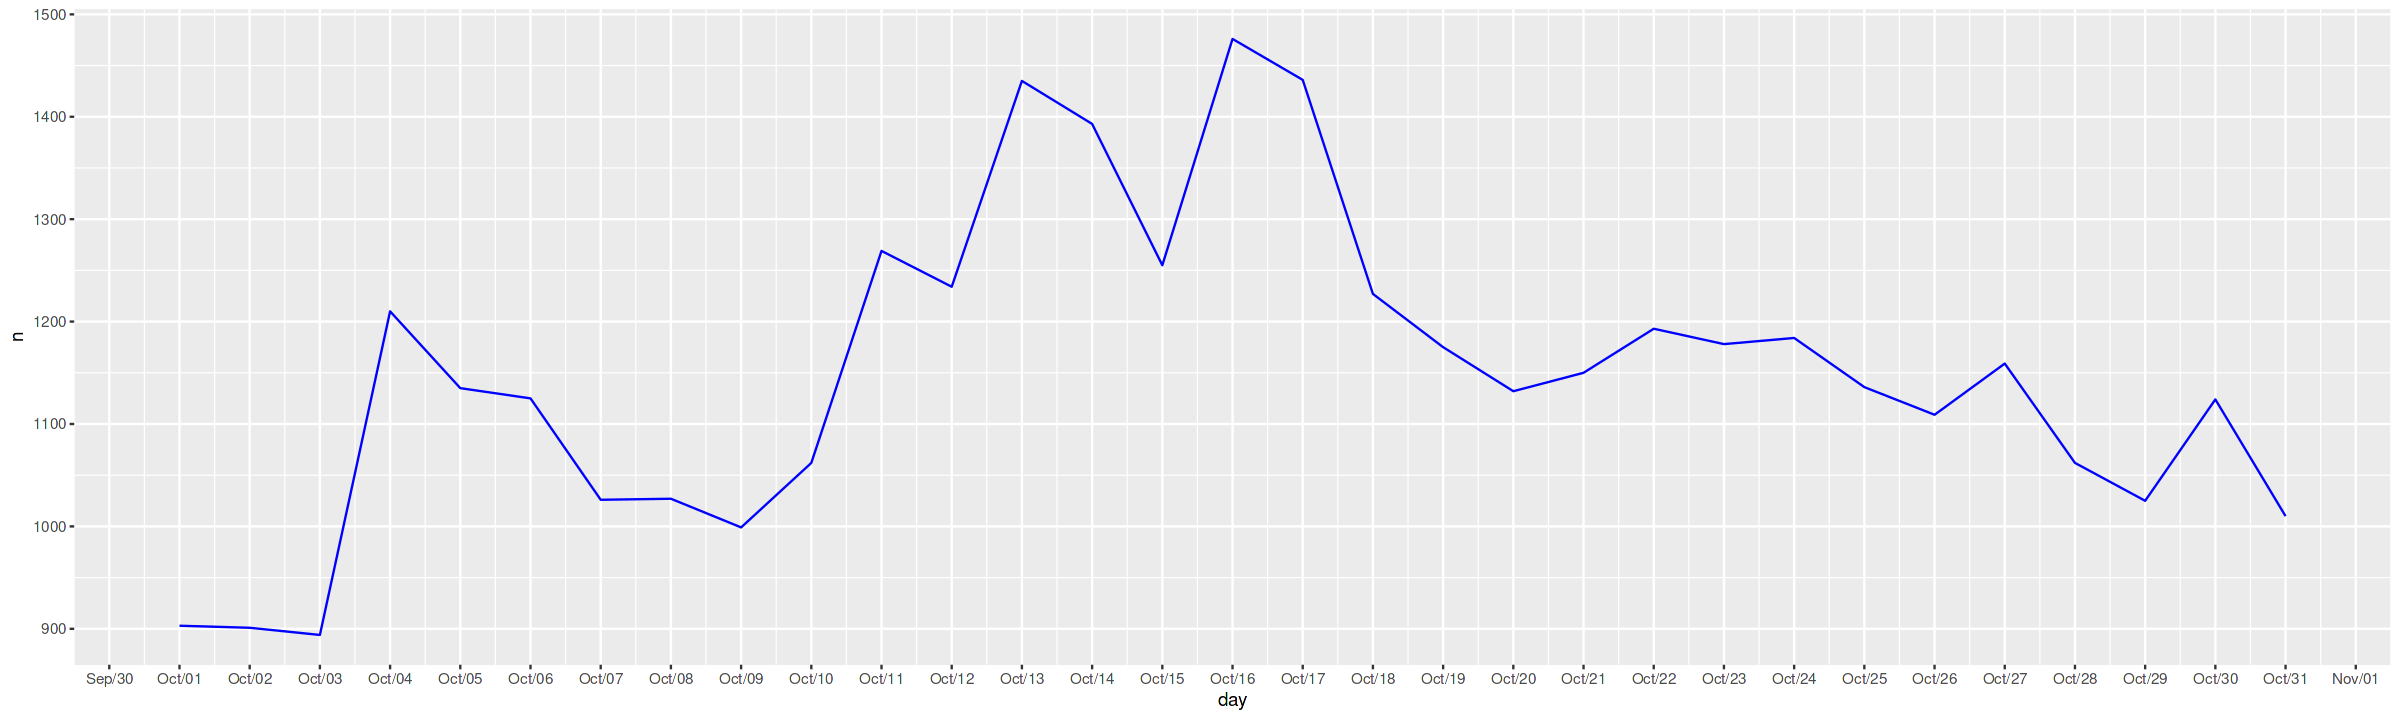

In [16]:
#check xiaomi daily purchase
data%>%
group_by(day= floor_date(event_time, 'day'))%>%
filter(category_code=='electronics.smartphone', event_type=='purchase', brand=='xiaomi')%>%
count(event_type) ->xiaomi_buy


head(xiaomi_buy)

options(repr.plot.width = 20, repr.plot.height = 6)
xiaomi_buy%>%
ggplot(aes(x=day,y=n))+
geom_line(color='blue')+
scale_x_date(date_breaks = "day",date_labels = "%b/%d")

day,event_type,n
<date>,<chr>,<int>
2019-10-01,view,71476
2019-10-02,view,68918
2019-10-03,view,67681
2019-10-04,view,82790
2019-10-05,view,75578
2019-10-06,view,75512


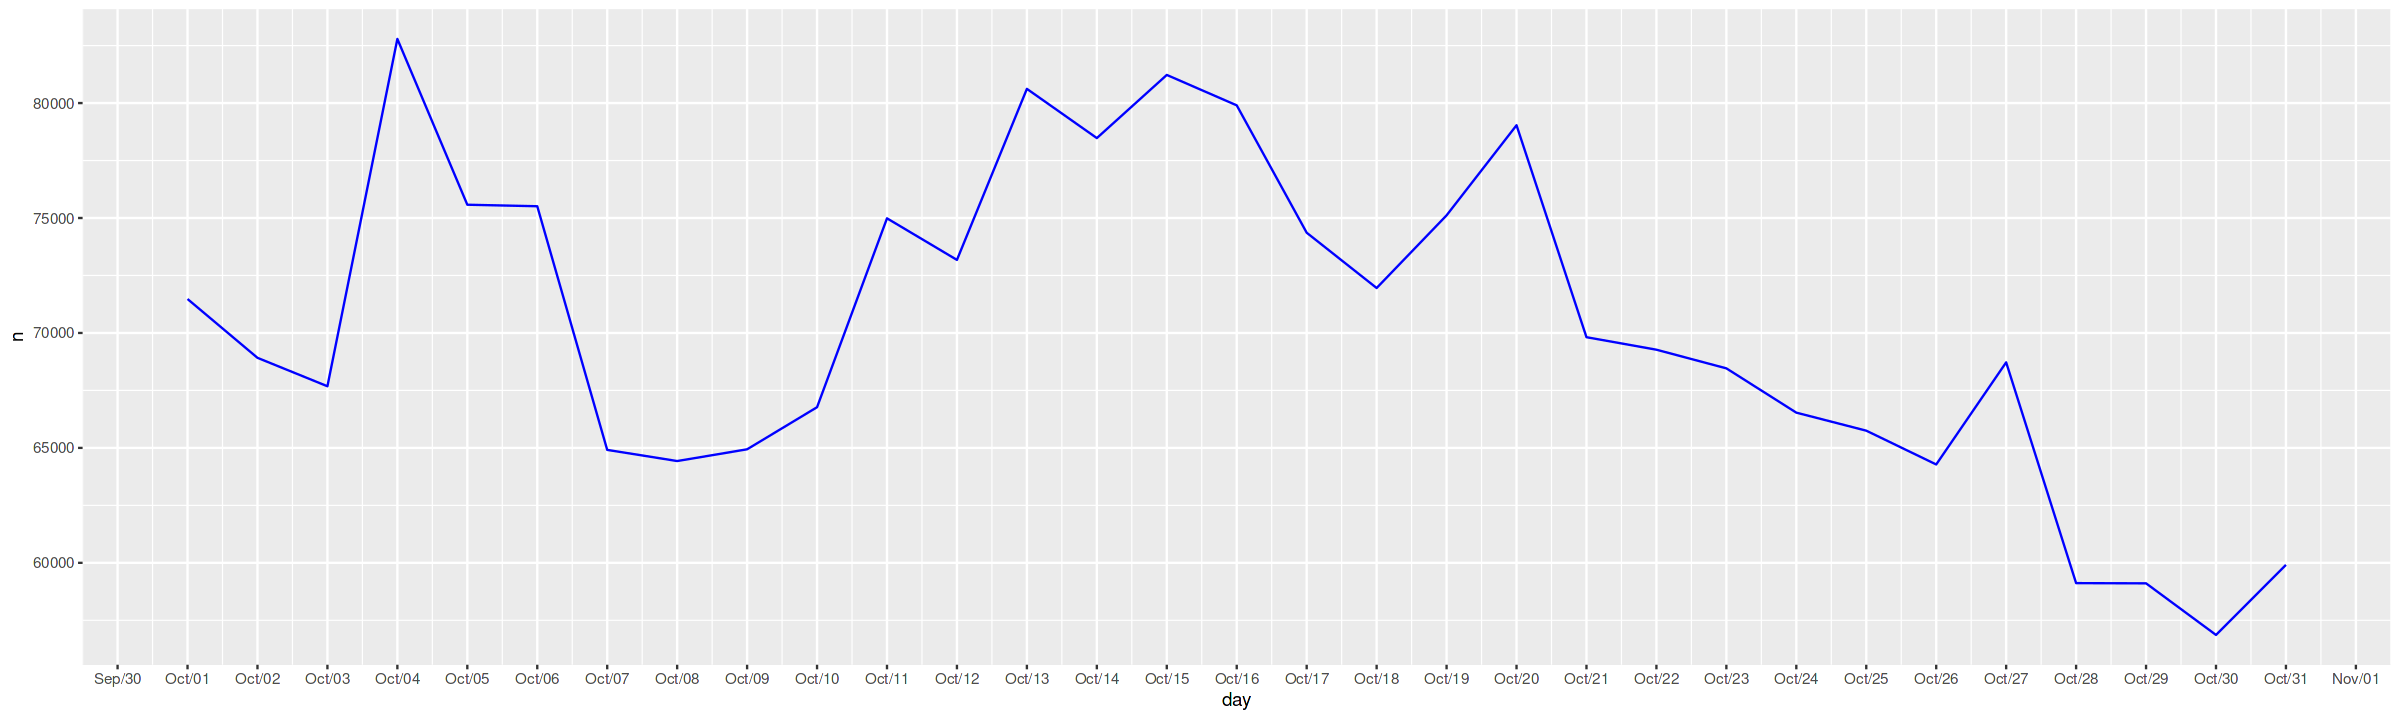

In [17]:
#check apple daily view
data%>%
group_by(day= floor_date(event_time, 'day'))%>%
filter(category_code=='electronics.smartphone', event_type=='view', brand=='apple')%>%
count(event_type) ->apple_view


head(apple_view)

options(repr.plot.width = 20, repr.plot.height = 6)
apple_view%>%
ggplot(aes(x=day,y=n))+
geom_line(color='blue')+
scale_x_date(date_breaks = "day",date_labels = "%b/%d")


day,event_type,n
<date>,<chr>,<int>
2019-10-01,cart,2707
2019-10-02,cart,2886
2019-10-03,cart,3193
2019-10-04,cart,5961
2019-10-05,cart,4682
2019-10-06,cart,4055


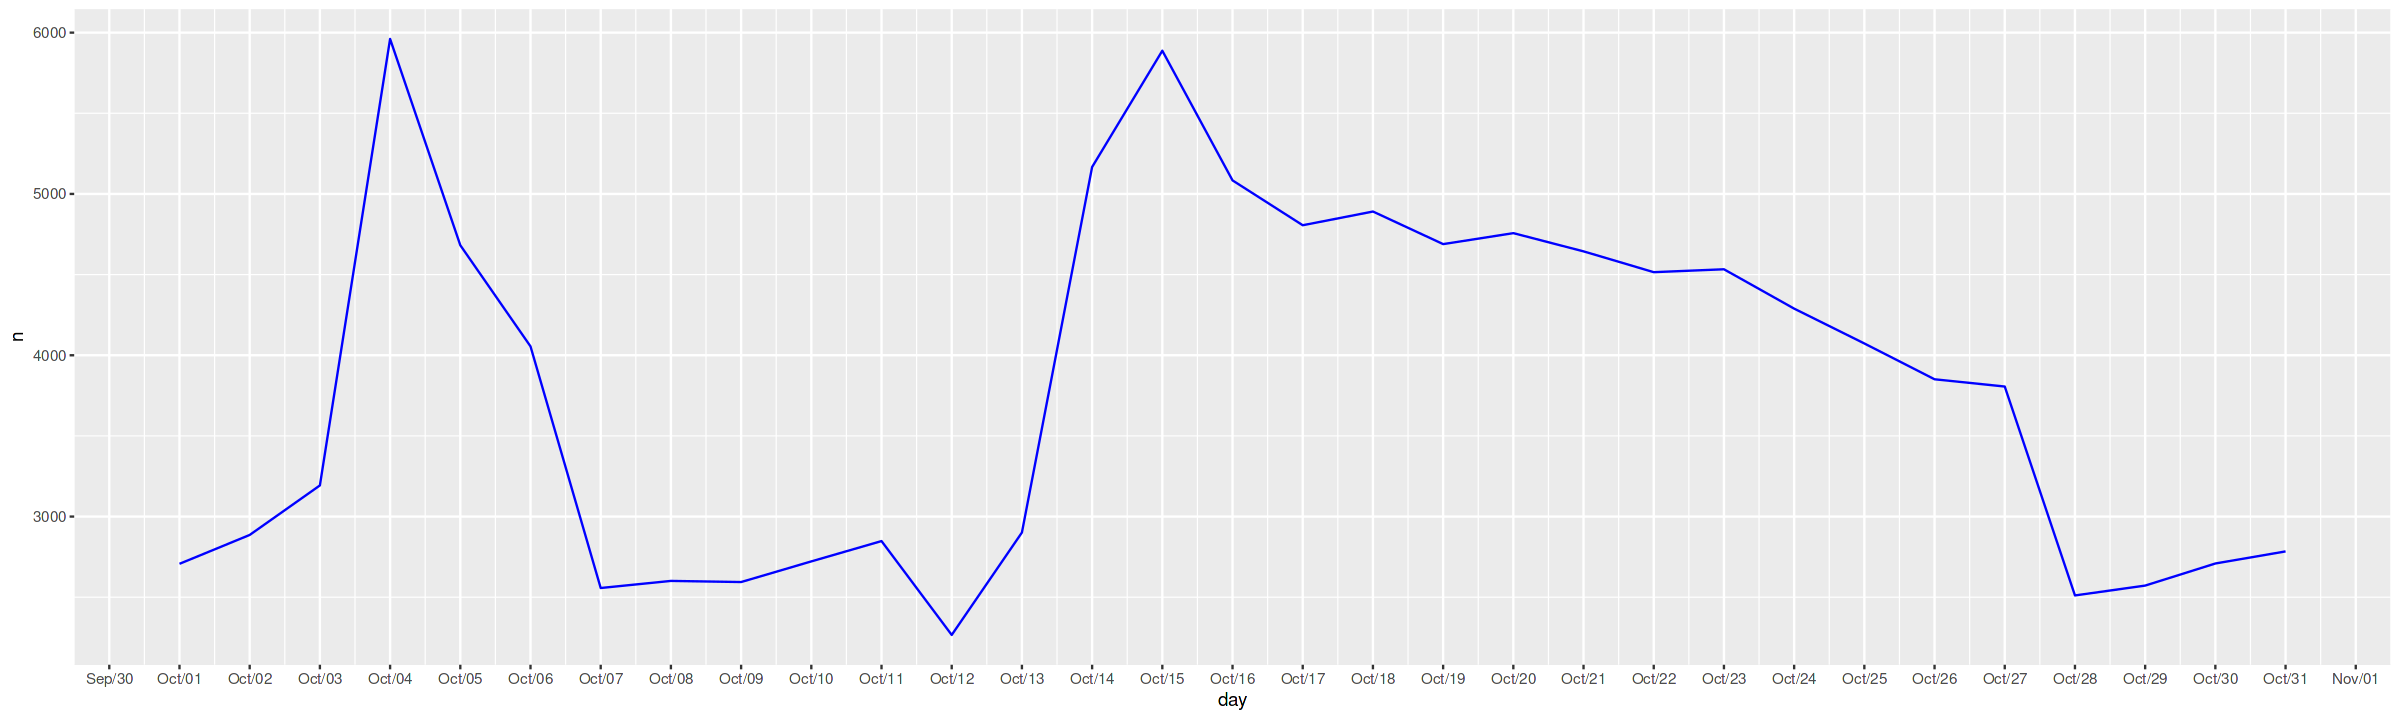

In [18]:
#check apple daily cart
data%>%
group_by(day= floor_date(event_time, 'day'))%>%
filter(category_code=='electronics.smartphone', event_type=='cart', brand=='apple')%>%
count(event_type) ->apple_cart


head(apple_cart)

options(repr.plot.width = 20, repr.plot.height = 6)
apple_cart%>%
ggplot(aes(x=day,y=n))+
geom_line(color='blue')+
scale_x_date(date_breaks = "day",date_labels = "%b/%d")


day,event_type,n
<date>,<chr>,<int>
2019-10-01,purchase,2971
2019-10-02,purchase,3012
2019-10-03,purchase,2952
2019-10-04,purchase,3919
2019-10-05,purchase,3318
2019-10-06,purchase,3098


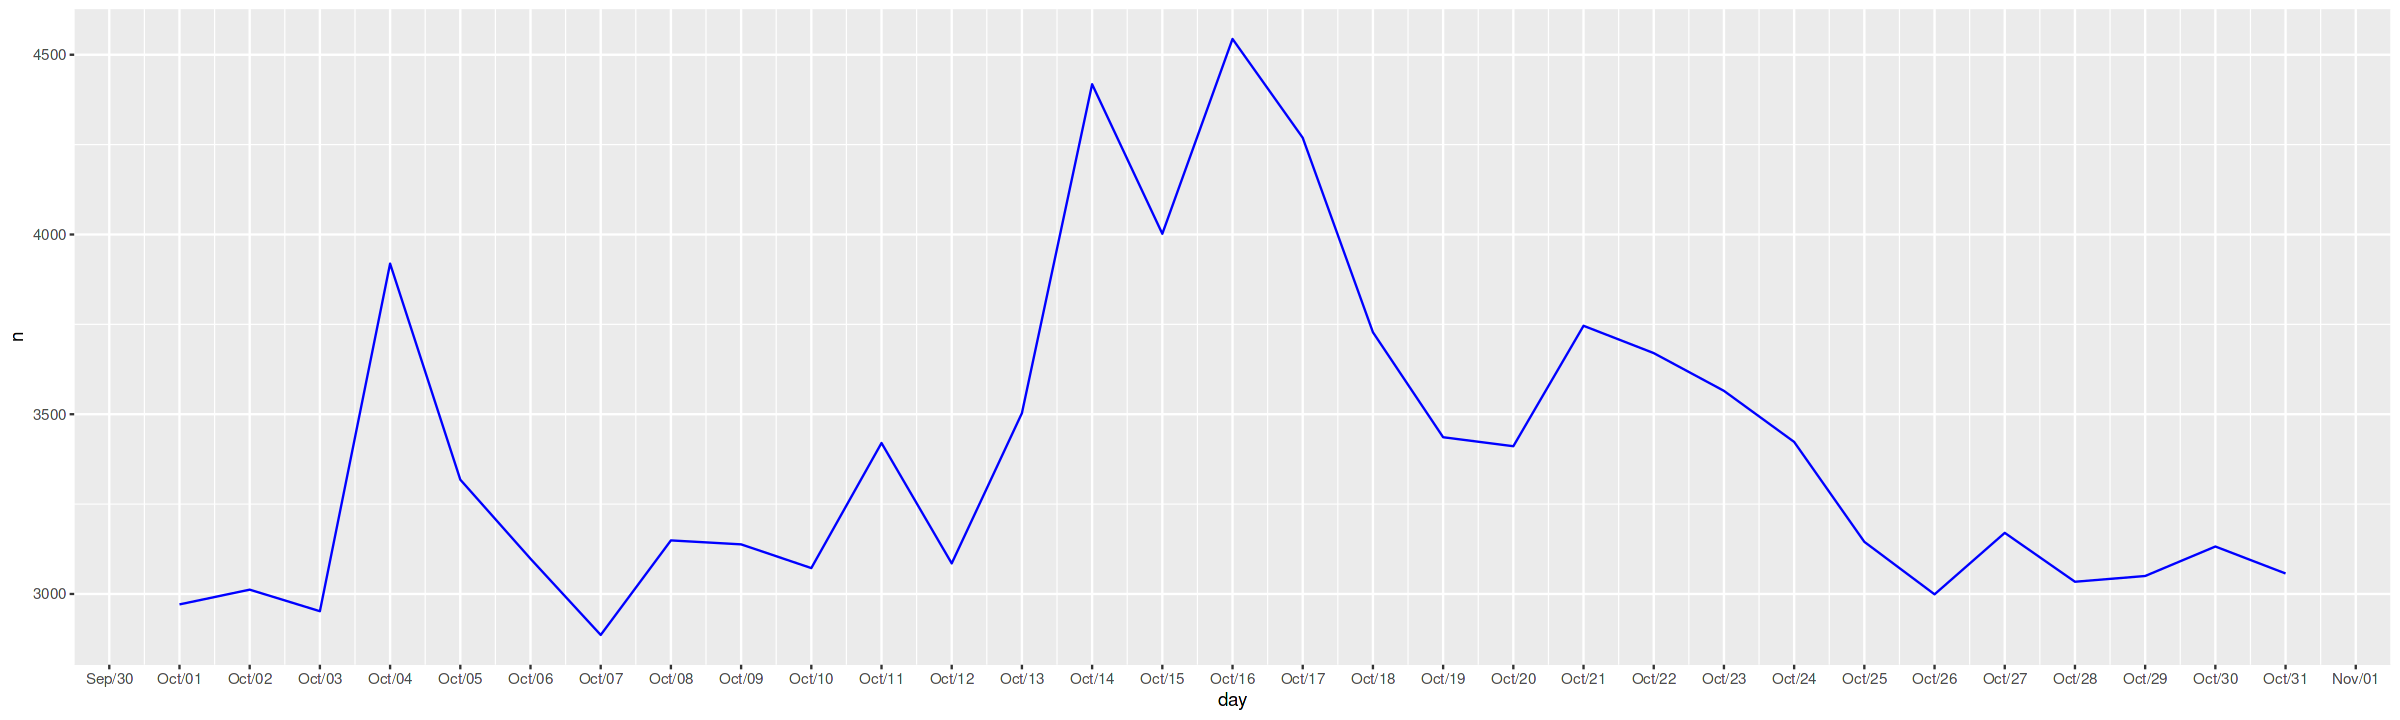

In [19]:
#check apple daily purchase
data%>%
group_by(day= floor_date(event_time, 'day'))%>%
filter(category_code=='electronics.smartphone', event_type=='purchase', brand=='apple')%>%
count(event_type) ->apple_purchase


head(apple_purchase)

options(repr.plot.width = 20, repr.plot.height = 6)
apple_purchase%>%
ggplot(aes(x=day,y=n))+
geom_line(color='blue')+
scale_x_date(date_breaks = "day",date_labels = "%b/%d")

day,event_type,n
<date>,<chr>,<int>
2019-10-01,view,66885
2019-10-02,view,68023
2019-10-03,view,66570
2019-10-04,view,75682
2019-10-05,view,68378
2019-10-06,view,68288


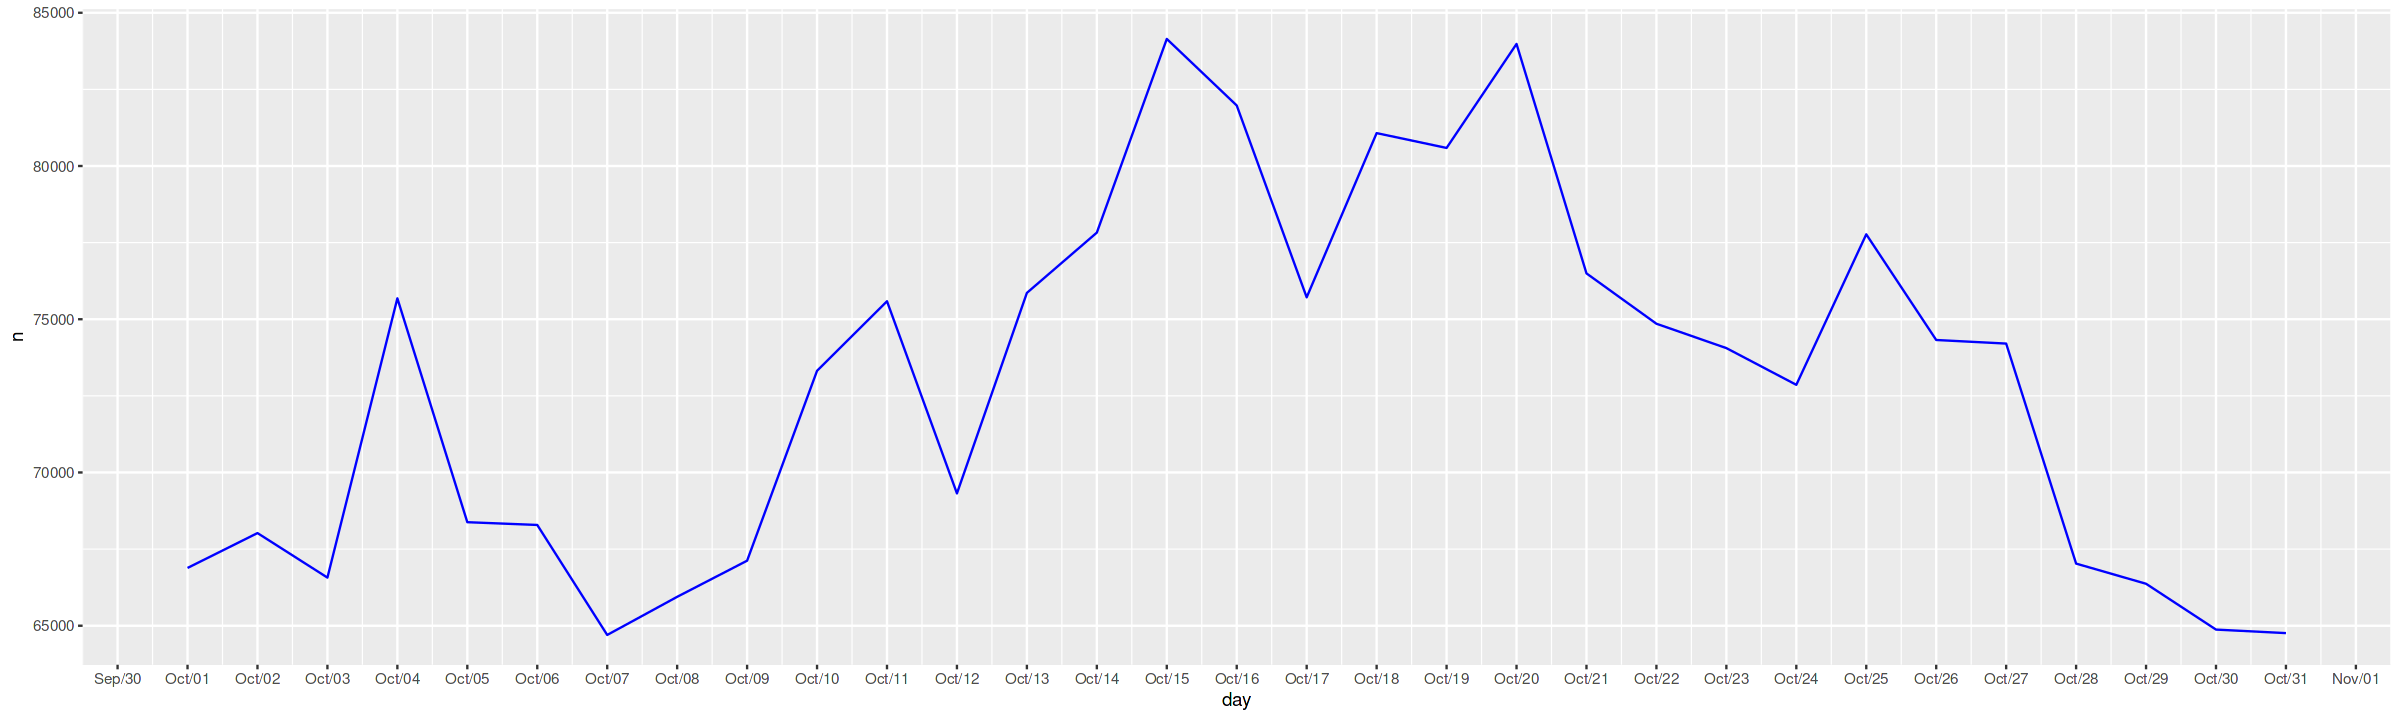

In [20]:
#check samsung daily view
data%>%
group_by(day= floor_date(event_time, 'day'))%>%
filter(category_code=='electronics.smartphone', event_type=='view', brand=='samsung')%>%
count(event_type) ->samsung_view


head(samsung_view)

options(repr.plot.width = 20, repr.plot.height = 6)
samsung_view%>%
ggplot(aes(x=day,y=n))+
geom_line(color='blue')+
scale_x_date(date_breaks = "day",date_labels = "%b/%d")

day,event_type,n
<date>,<chr>,<int>
2019-10-01,cart,3351
2019-10-02,cart,3364
2019-10-03,cart,3782
2019-10-04,cart,7211
2019-10-05,cart,5571
2019-10-06,cart,5400


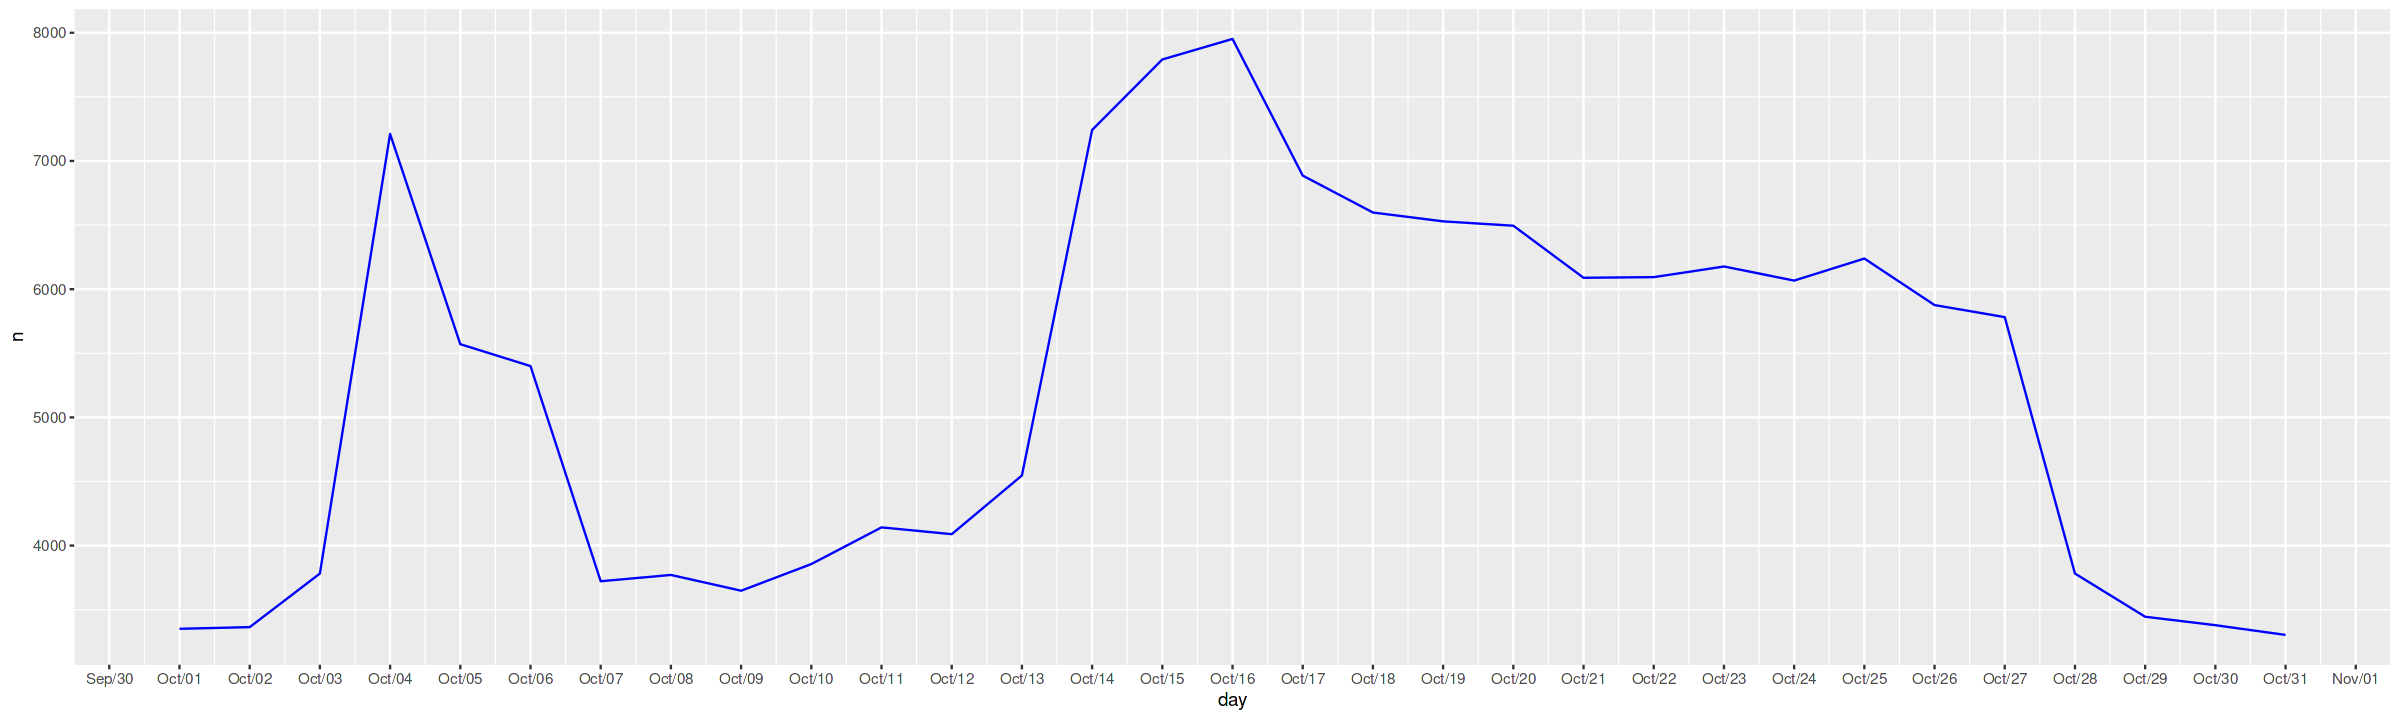

In [21]:
#check samsung daily cart
data%>%
group_by(day= floor_date(event_time, 'day'))%>%
filter(category_code=='electronics.smartphone', event_type=='cart', brand=='samsung')%>%
count(event_type) ->samsung_cart

head(samsung_cart)

options(repr.plot.width = 20, repr.plot.height = 6)
samsung_cart%>%
ggplot(aes(x=day,y=n))+
geom_line(color='blue')+
scale_x_date(date_breaks = "day",date_labels = "%b/%d")

day,event_type,n
<date>,<chr>,<int>
2019-10-01,cart,3351
2019-10-02,cart,3364
2019-10-03,cart,3782
2019-10-04,cart,7211
2019-10-05,cart,5571
2019-10-06,cart,5400


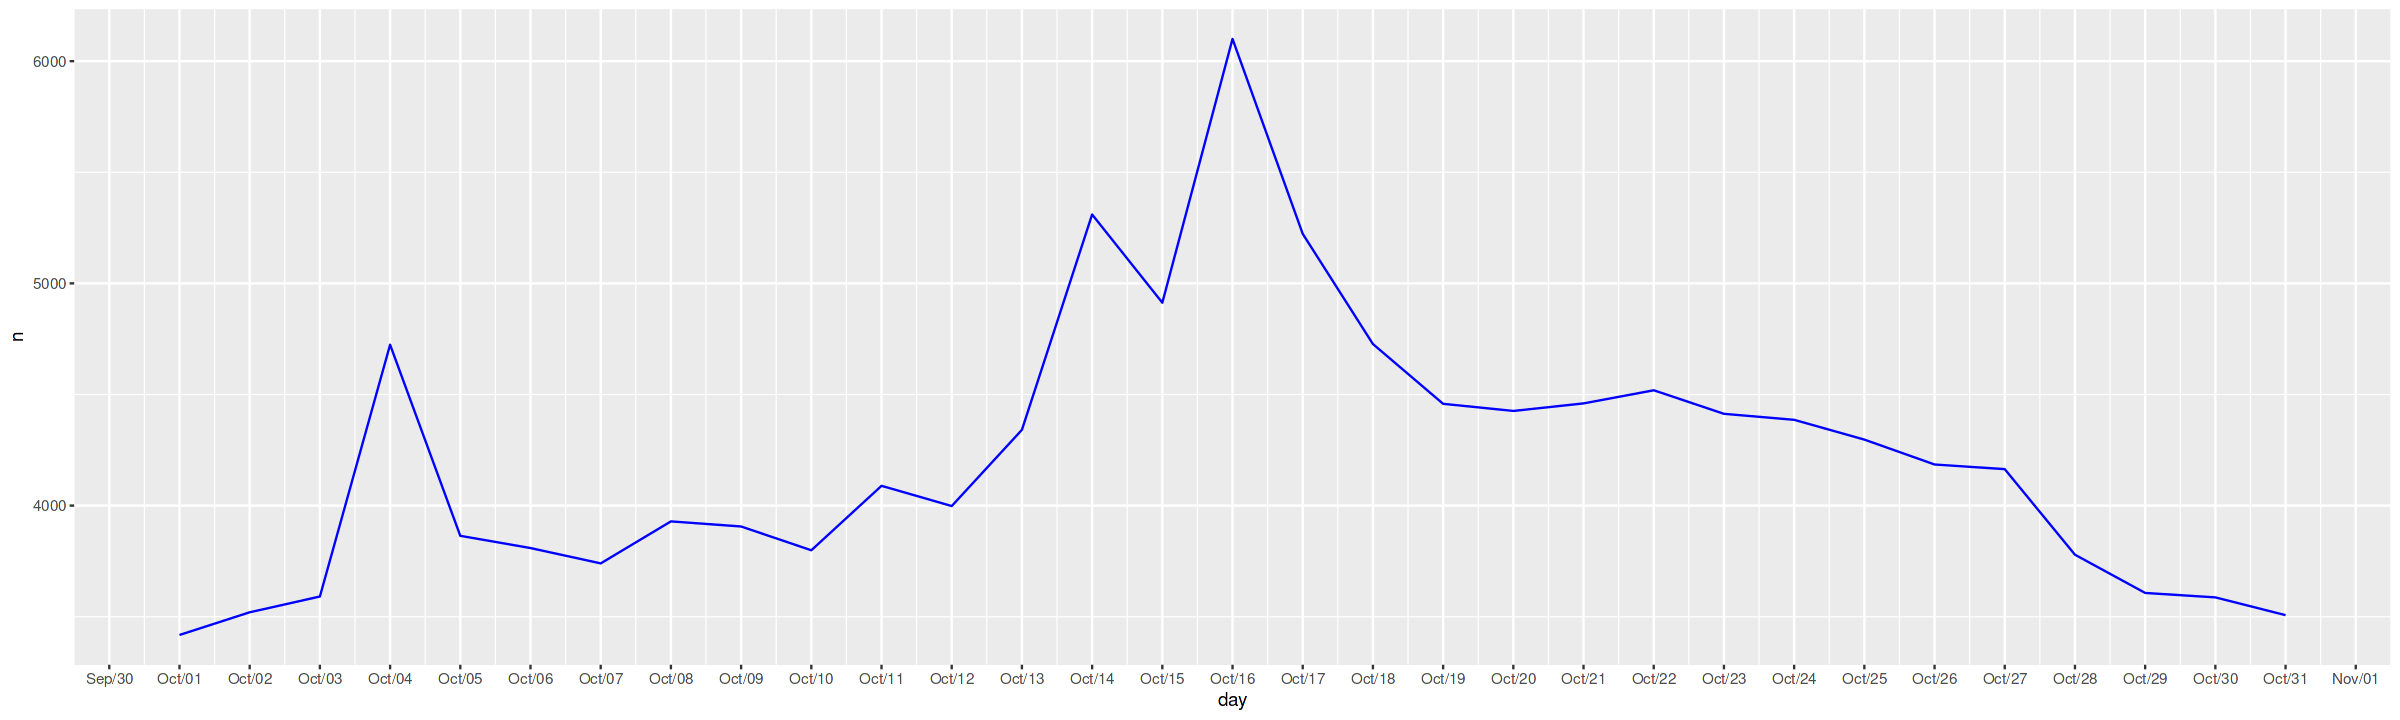

In [22]:
#check samsung daily purchase
data%>%
group_by(day= floor_date(event_time, 'day'))%>%
filter(category_code=='electronics.smartphone', event_type=='purchase', brand=='samsung')%>%
count(event_type) ->samsung_purchase


head(samsung_cart)

options(repr.plot.width = 20, repr.plot.height = 6)
samsung_purchase%>%
ggplot(aes(x=day,y=n))+
geom_line(color='blue')+
scale_x_date(date_breaks = "day",date_labels = "%b/%d")

day,event_type,n
<date>,<chr>,<int>
2019-10-01,view,26307
2019-10-02,view,26258
2019-10-03,view,25646
2019-10-04,view,28390
2019-10-05,view,26130
2019-10-06,view,26011


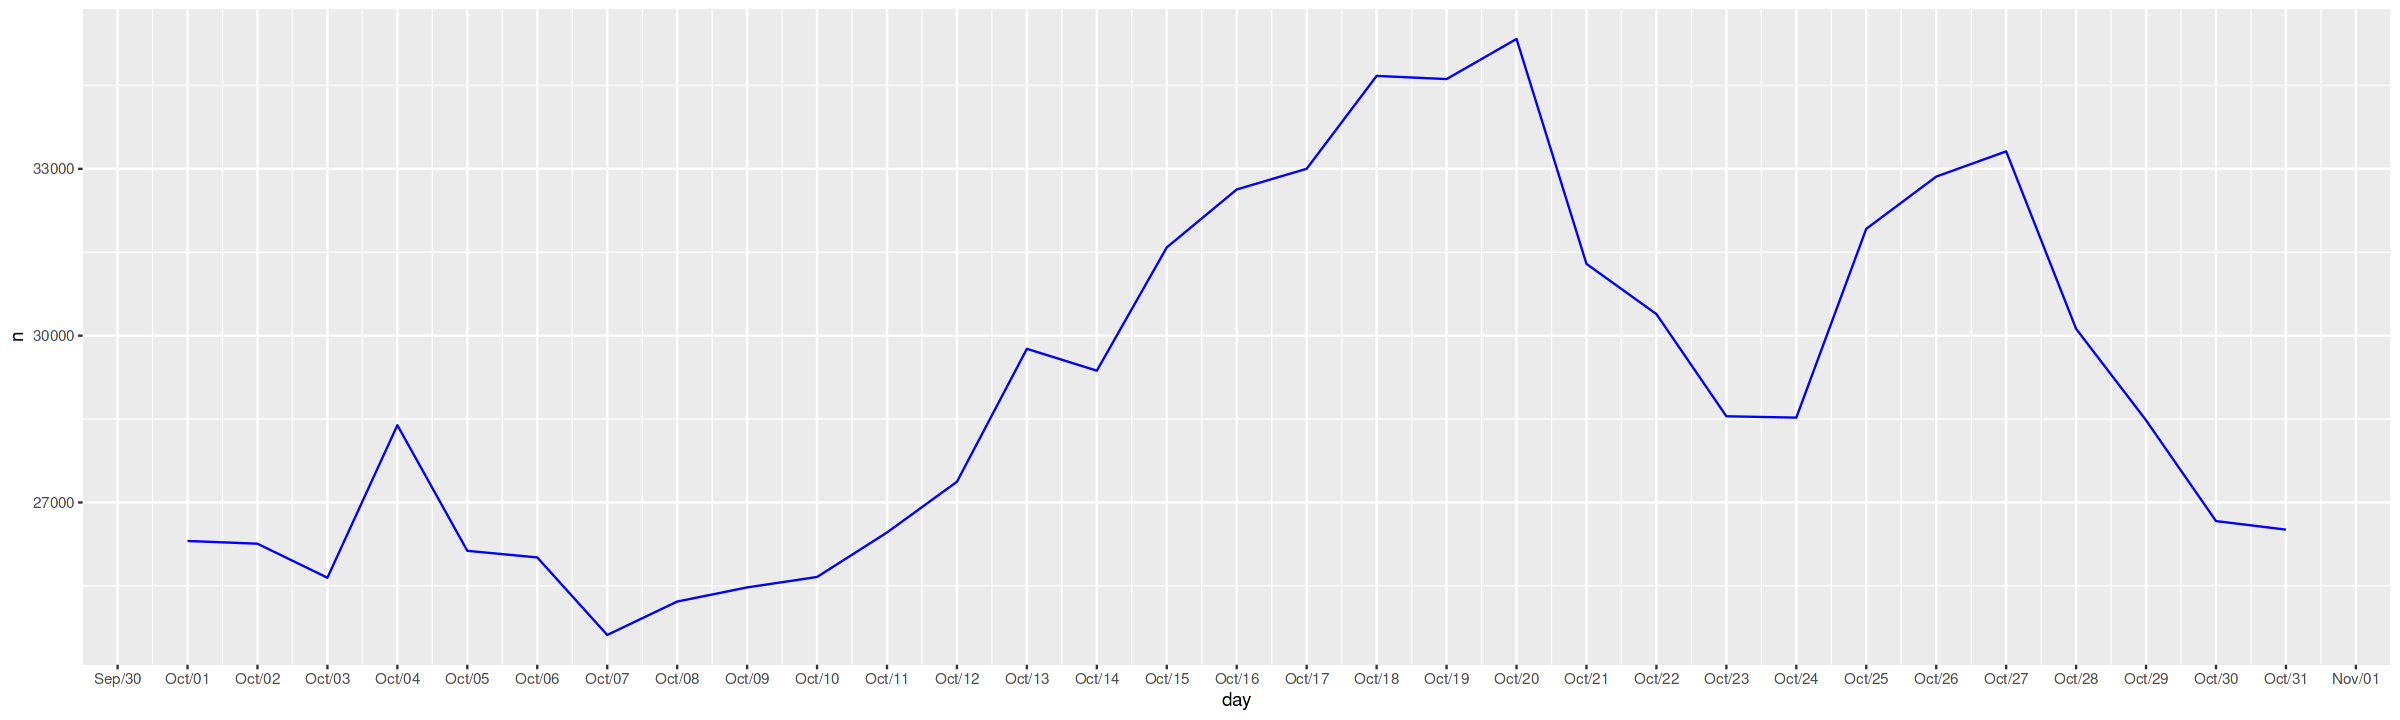

In [23]:
#check oppo and huawei daily view
data%>%
group_by(day= floor_date(event_time, 'day'))%>%
filter(category_code=='electronics.smartphone', event_type=='view', brand=='oppo'| brand=='huawei')%>%
count(event_type) ->oppo_huawei_view


head(oppo_huawei_view)

options(repr.plot.width = 20, repr.plot.height = 6)
oppo_huawei_view%>%
ggplot(aes(x=day,y=n))+
geom_line(color='blue')+
scale_x_date(date_breaks = "day",date_labels = "%b/%d")

day,event_type,n
<date>,<chr>,<int>
2019-10-01,cart,816
2019-10-02,cart,883
2019-10-03,cart,908
2019-10-04,cart,1740
2019-10-05,cart,1569
2019-10-06,cart,1424


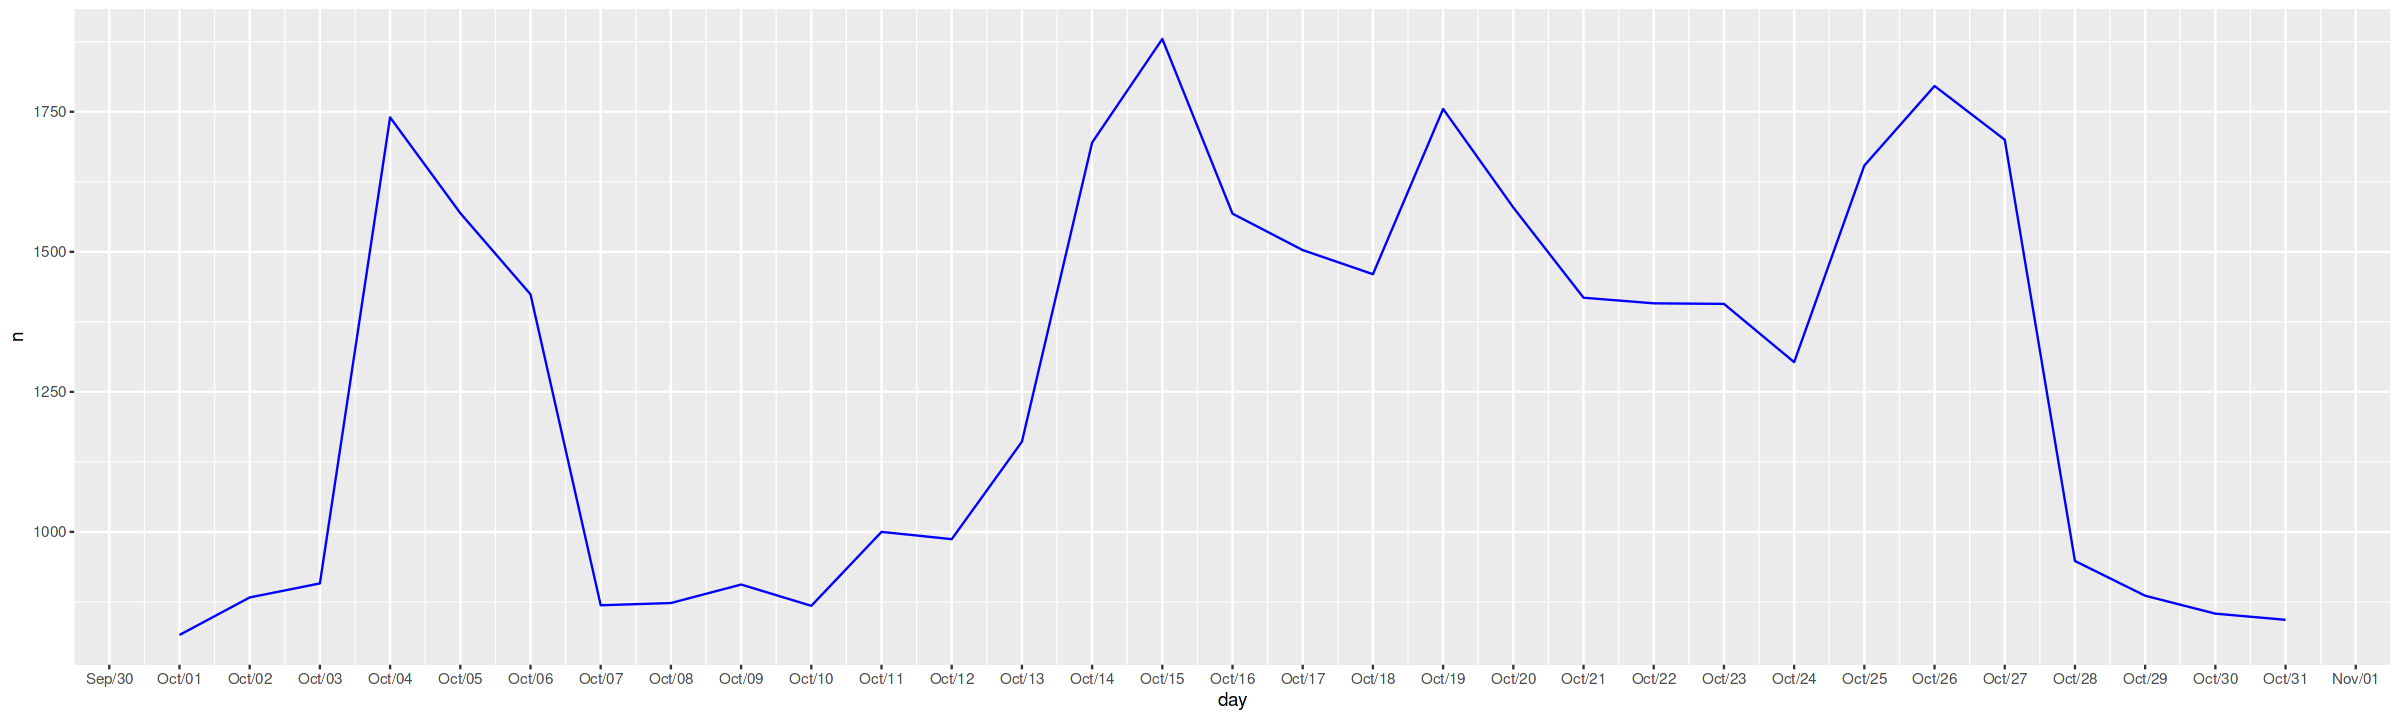

In [24]:
#check oppo and huawei daily cart
data%>%
group_by(day= floor_date(event_time, 'day'))%>%
filter(category_code=='electronics.smartphone', event_type=='cart', brand=='oppo'| brand=='huawei')%>%
count(event_type) ->oppo_huawei_cart


head(oppo_huawei_cart)

options(repr.plot.width = 20, repr.plot.height = 6)
oppo_huawei_cart%>%
ggplot(aes(x=day,y=n))+
geom_line(color='blue')+
scale_x_date(date_breaks = "day",date_labels = "%b/%d")

day,event_type,n
<date>,<chr>,<int>
2019-10-01,purchase,812
2019-10-02,purchase,844
2019-10-03,purchase,841
2019-10-04,purchase,1097
2019-10-05,purchase,1012
2019-10-06,purchase,947


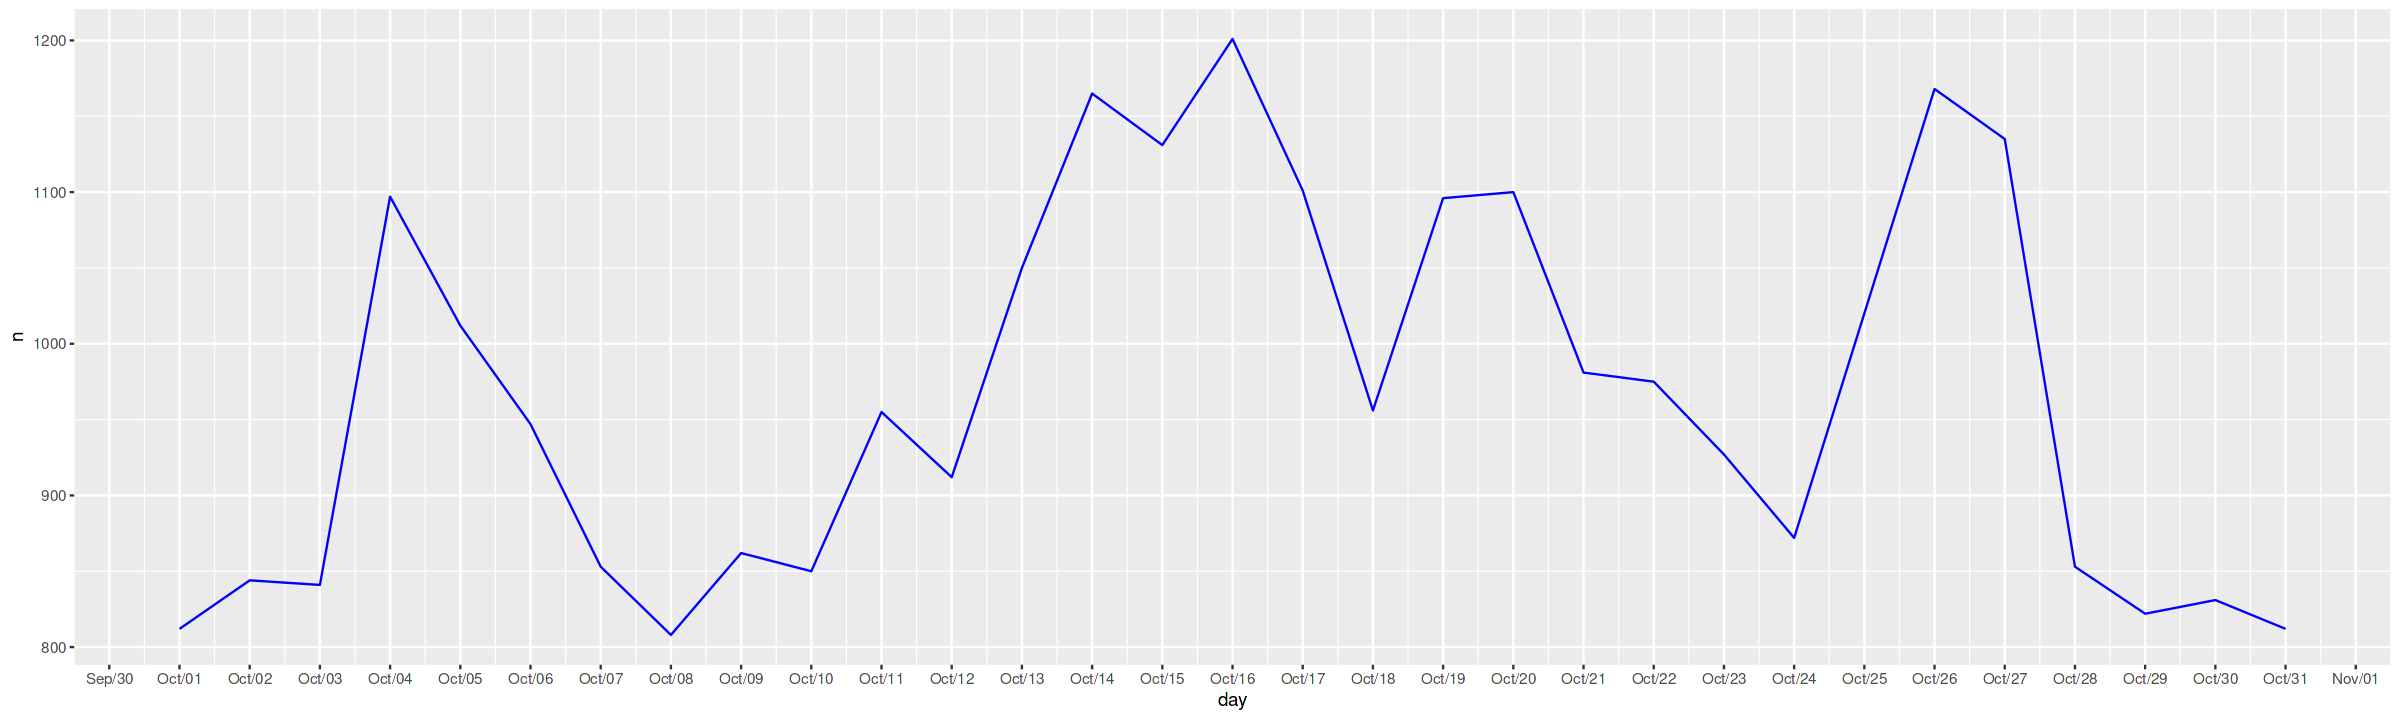

In [25]:
#check oppo and huawei daily purchase
data%>%
group_by(day= floor_date(event_time, 'day'))%>%
filter(category_code=='electronics.smartphone', event_type=='purchase', brand=='oppo'| brand=='huawei')%>%
count(event_type) ->oppo_huawei_purchase


head(oppo_huawei_purchase)

options(repr.plot.width = 20, repr.plot.height = 6)
oppo_huawei_purchase%>%
ggplot(aes(x=day,y=n))+
geom_line(color='blue')+
scale_x_date(date_breaks = "day",date_labels = "%b/%d")

**Recomendation**

Create an "cart" campaign with the aim of getting consumers to add the items they see or want to their cart. This is based on the very high conversion from cart to purchase function reaching 92.73%

Give promos at the beginning of the month to increase peak sales at the beginning and in the middle of the month

Promos for smartphone buyers with Apple, Samsung, Huawei, Oppo, and Xiaomi brands according to their class
customer continuity.